DOMAIN: Electronics and Telecommunication
• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.
• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality
• PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.
Steps and tasks: [ Total Score: 30 Marks]

1. Data import and Understanding [10 Marks]
A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, BatchNormalization,  Dropout,LeakyReLU
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy,BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy,categorical_crossentropy,sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.metrics import AUC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from kerastuner import Hyperband
import kerastuner as kerastuner


In [142]:
signal_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning/Assignment/NN Project Data - Signal.csv')

In [143]:
signal_df.head(5)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [144]:
### checking the df using info 

In [145]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observation : ** 
### 1)  All the parameter are in float64 
### 2)  Signal_Strength is mentioned in int64
### 3)  No parameter are having Object as Dtype. Looks like no null value or missing value are present in the dataframe.

### Checking for null value in the dataframe

In [146]:
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

B. Check for missing values and print percentage for each attribute. [2 Marks]

In [147]:
print("missing value of each feature in percentage")
signal_df.isna().sum()/signal_df.isna().count()*100

missing value of each feature in percentage


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

#### There are no null values in any of the features

C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

In [148]:
print("Is there any duplicate records present in the dataframe? ", signal_df.duplicated().any())
print("Count the number of duplicate records present in the dataframe? ", signal_df.duplicated().sum())

Is there any duplicate records present in the dataframe?  True
Count the number of duplicate records present in the dataframe?  240


In [149]:
print("Printing all the duplicate record in the signal dataframe")
duplicate = signal_df[signal_df.duplicated()]
duplicate

Printing all the duplicate record in the signal dataframe


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

In [150]:
### Remove the duplicate element from the dataframe

In [151]:
signal_df.drop_duplicates(inplace=True, ignore_index=True)

In [152]:
print("Is there any duplicate records left after dropping? ", signal_df.duplicated().sum())

Is there any duplicate records left after dropping?  0


### Data Exploration  & Visualisation 

# Let's view the statistical summary of the numerical columns in the data

In [153]:
signal_df.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000   
mean      8.310596     0.529478     0.272333     2.523400     0.088124   
std       1.736990     0.183031     0.195537     1.352314     0.049377   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1359.000000  1359.000000  1359.000000  1359.000000   1359.000000   
mean     15.893304    46.825975     0.996709     3.309787      0.658705   
std      10.447270    33.408946     0.001869     0.155036      0.170667   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996700     3.310000      0.620000   
75%      21.000000    63.000000     0.997820     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1359.000000      1359.000000  
mean      10.432315         5.623252  
std        1.082065         0.823578  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

#### There are 1359 Records in the dataset after removing the duplicate records.
#### Parameter 1 are having smaller value 4.6 and maximum values as 15.90
#### Parameter 2 are having smaller value 0.12 and maximum values as 1.58
#### Parameter 3 are having smaller value 0 and maximum values as 1
#### Parameter 6 and 7 are having larger values.. 
#### Dataset is not scaled, some are having higher value and some are lesser.
#### Target variable(Signal_Strength) are catagorical value ranging from 3 to 8.
#### Parameter1, parameter 4, 5, 7 are having mean greater than median . So it would be rightly skewed.
#### Maximum value of parameter are very much bigger than 75%. It will be rightly skewed

### Checking for unique element in each paramter 

In [154]:
signal_df.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

#### Signal_Strength are having 6 unique elements.
#### Since parameter 1 to 11 are all numeric , thereforce many unique element are present in each feature

### EDA

Univariant Analysis

In [155]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label='Mean'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label='Median'
    )  # Add median to the histogram
    ax_hist2.legend()

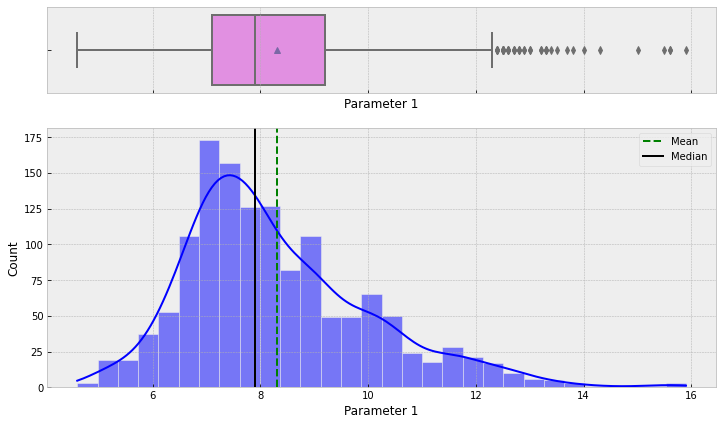

In [156]:
histogram_boxplot(data= signal_df, feature="Parameter 1", kde=True)

```
# There are many outliers in parameter 1 .
# Mean of Parameter 1 is greater than Median. Plot is rightly Skewed
# Maximum number of element are near about 7.
```



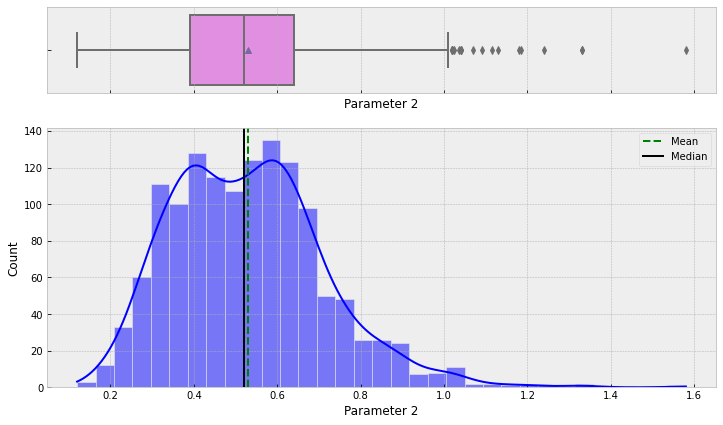

In [157]:
histogram_boxplot(data= signal_df, feature="Parameter 2", kde=True)



```
# There are some outliers in Parameter 2.
# Mean and Median are almost equal
# More number of element are near about 0.4 and 0.6.
# Data is rightly distributed.
```



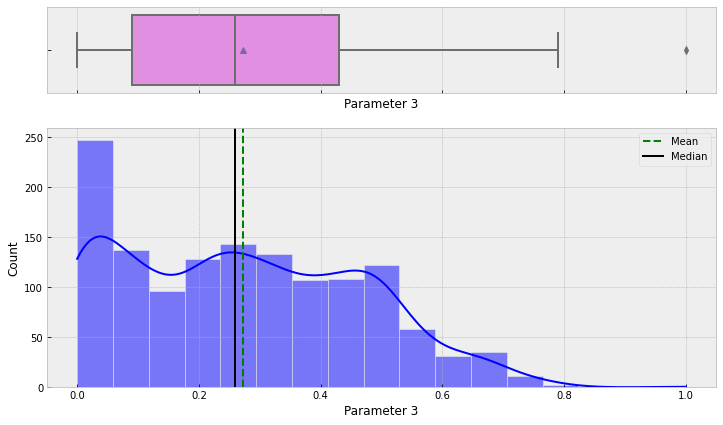

In [158]:
histogram_boxplot(data= signal_df, feature="Parameter 3", kde=True)



```
There is one outliers present.
Mean and Median are almost near about. 
Most of the records are less than 0.05
```



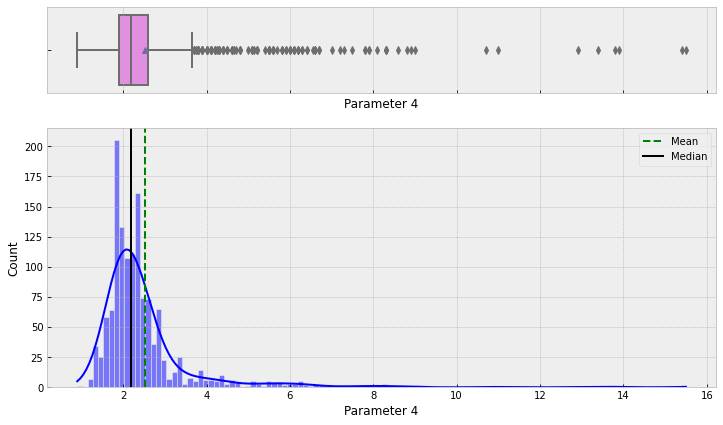

In [159]:
histogram_boxplot(data= signal_df, feature="Parameter 4", kde=True)



*   many Outliers are present 
*   Most of data are present between 1.9 to 2.5.
*   Outlier treament should be done.
*   Some of the data are present around 15. 
*   Outliers are deviating model to give high accuracy.









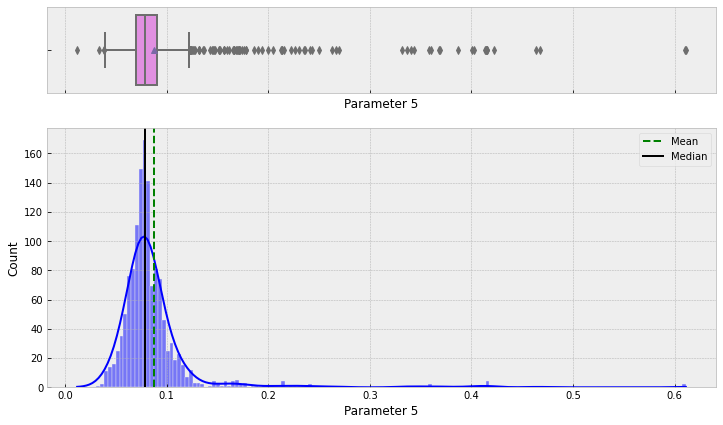

In [160]:
histogram_boxplot(data= signal_df, feature="Parameter 5", kde=True)



*   many Outliers are present 
*   Most of data are present between 0 to 0.15
*   Very small number of records are present at 0.6







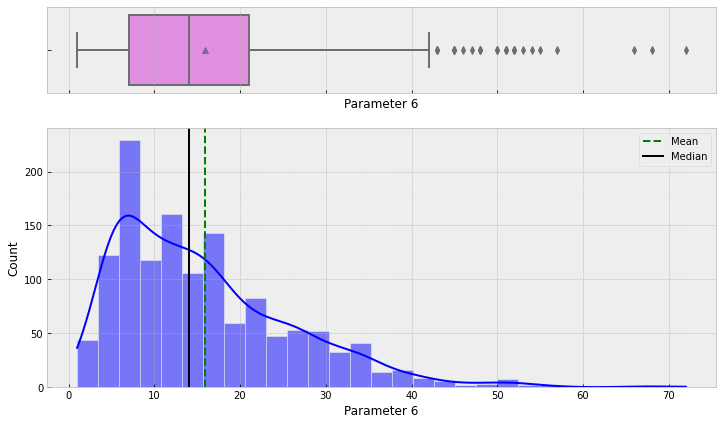

In [161]:
histogram_boxplot(data= signal_df, feature="Parameter 6", kde=True)



*   Half of the values are near about 15.
*   Outliers are present.
*   Most of the signal data of parameter 6 are near about 6-8





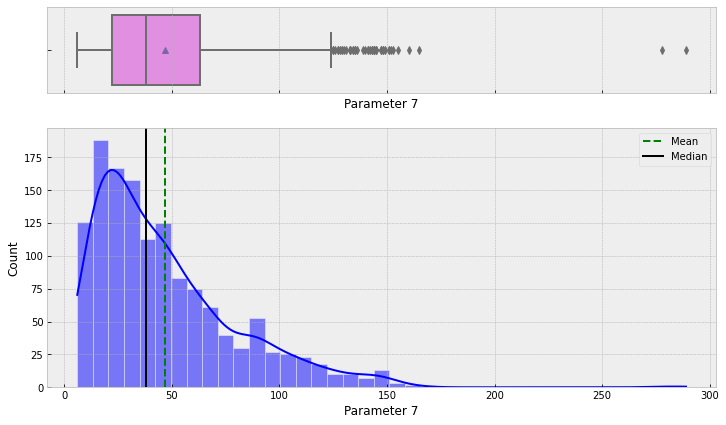

In [162]:
histogram_boxplot(data= signal_df, feature="Parameter 7", kde=True)



*   Plot is rightly skewed.
*   Half of the observation is below 40.
*   Outliers are present





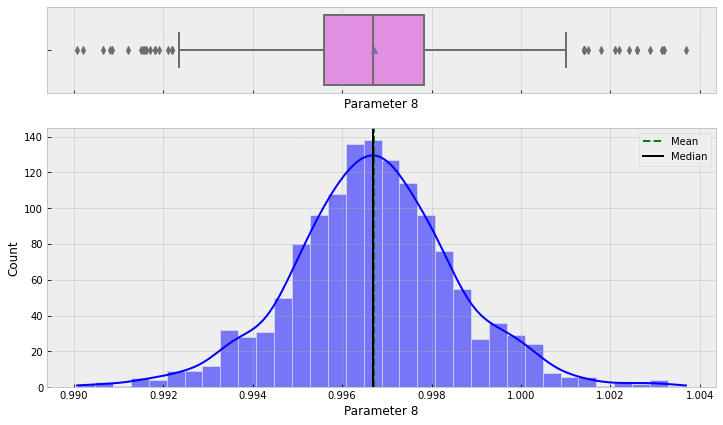

In [163]:
histogram_boxplot(data= signal_df, feature="Parameter 8", kde=True)



*   Outliers are present at both end.
*   Min range is 0.9 and max range is 1.004.
*   Half of the element are below 0.997






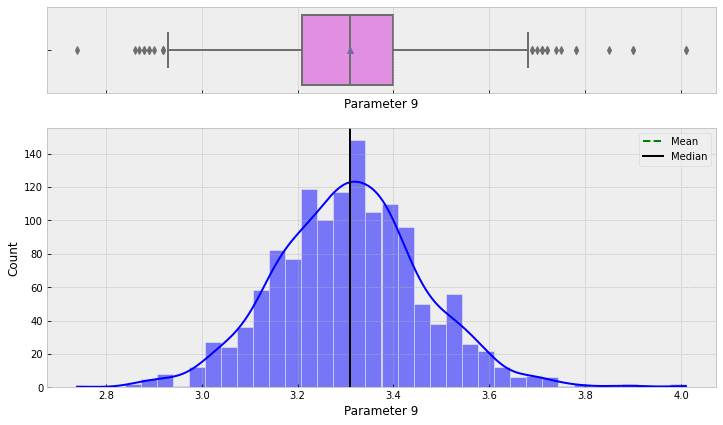

In [164]:
histogram_boxplot(data= signal_df, feature="Parameter 9", kde=True)



*   Mean and median is same
*   Outliers are present at both end

*  Plot is rightly skewed because of the outliers






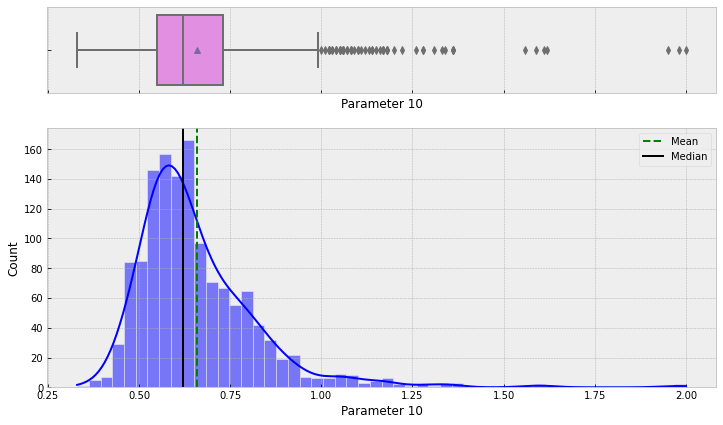

In [165]:
histogram_boxplot(data= signal_df, feature="Parameter 10", kde=True)

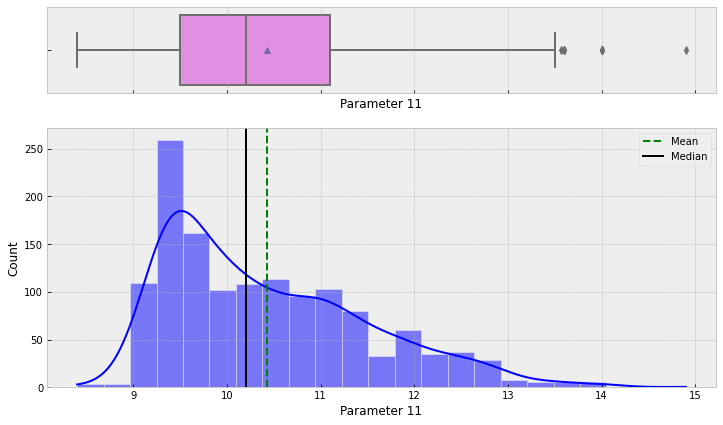

In [166]:
histogram_boxplot(data= signal_df, feature="Parameter 11", kde=True)




*   LEss number of outliers are present.
*   Plot is rightly skewed.
*   Most of the signal parameter are in 9.3 to 9.4




---



Bi-Variant Analysis

In [167]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(1, 8, figsize=(25, 6))

    target_uniq = np.sort(data[target].unique())

    axs[0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0],
        color="teal",
    )

    axs[1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[1],
        color="orange",
    )
    axs[2].set_title("Distribution of target for target=" + str(target_uniq[2]))
    sns.histplot(
        data=data[data[target] == target_uniq[2]],
        x=predictor,
        kde=True,
        ax=axs[2],
        color="orange",
    )
    axs[3].set_title("Distribution of target for target=" + str(target_uniq[3]))
    sns.histplot(
        data=data[data[target] == target_uniq[2]],
        x=predictor,
        kde=True,
        ax=axs[3],
        color="orange",
    )
    axs[4].set_title("Distribution of target for target=" + str(target_uniq[4]))
    sns.histplot(
        data=data[data[target] == target_uniq[2]],
        x=predictor,
        kde=True,
        ax=axs[4],
        color="orange",
    )
    axs[5].set_title("Distribution of target for target=" + str(target_uniq[5]))
    sns.histplot(
        data=data[data[target] == target_uniq[2]],
        x=predictor,
        kde=True,
        ax=axs[5],
        color="orange",
    )

    axs[6].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[6], palette="gist_rainbow")

    axs[7].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[7],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


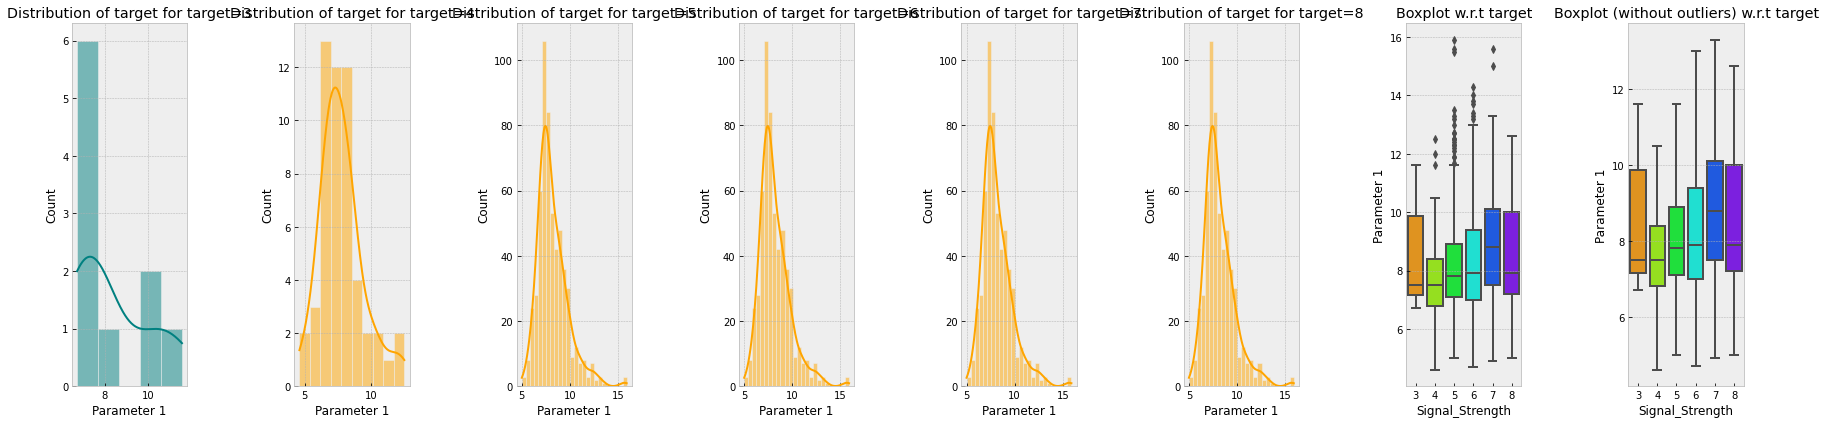

In [168]:
distribution_plot_wrt_target(signal_df, 'Parameter 1', "Signal_Strength")



*   Looks like we have outliers in class 4,5,6,7.
*   Most of the Signal Strength data of target class 3 in parameter 1 is below 8 
*   Target Class 3 are very less in number.
*   Class 3 and 8 are not having outliers



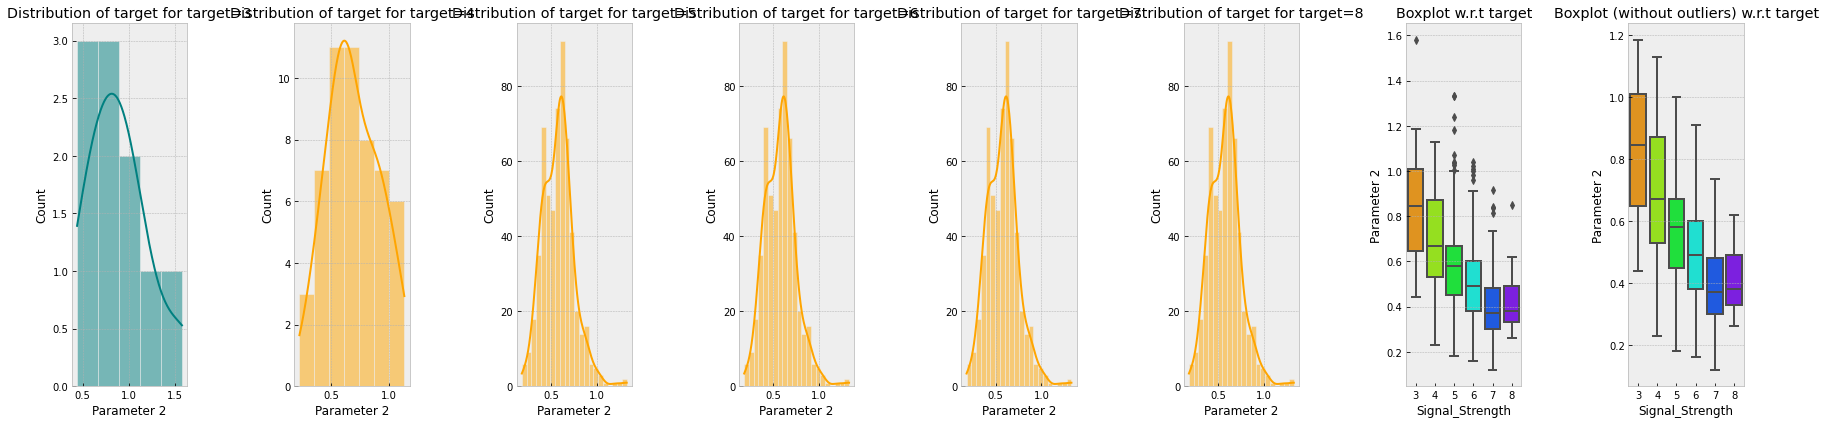

In [169]:
distribution_plot_wrt_target(signal_df, 'Parameter 2', "Signal_Strength")



1.   Outliers are present for class 5,6,7,8
2.   Class 3, 8 are having less outliers
3.   Class 4 does not have outliers.


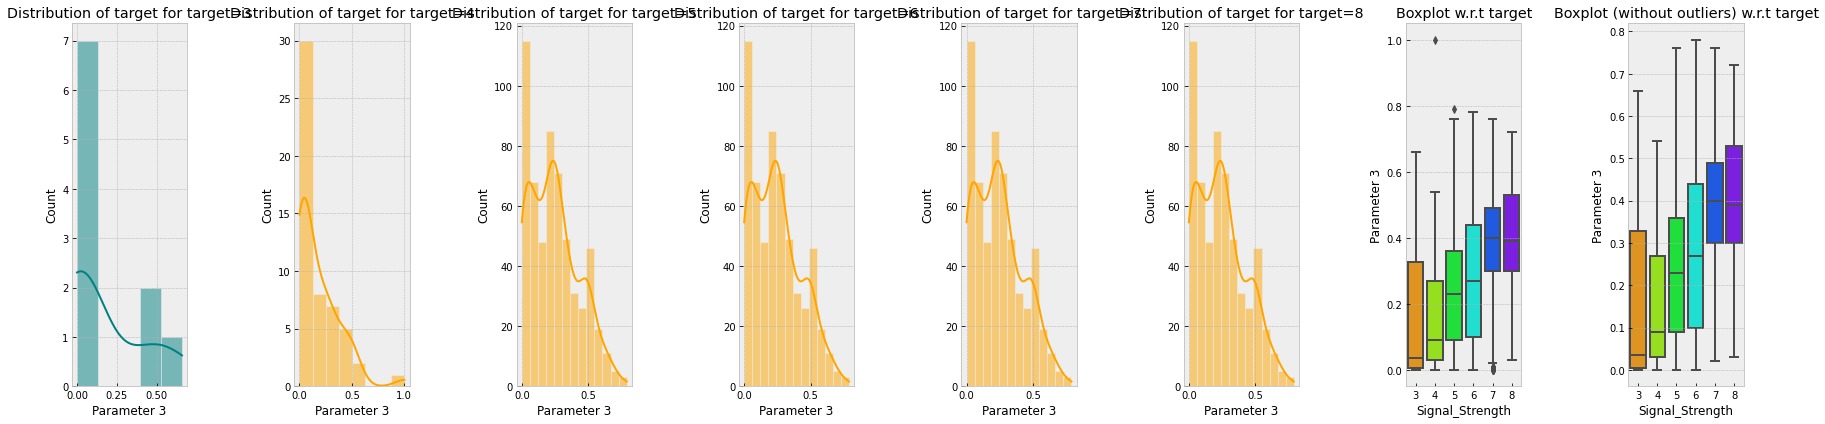

In [170]:
distribution_plot_wrt_target(signal_df, 'Parameter 3', "Signal_Strength")



*   Signal Strength 3 are having  almost 0 values for parameter 3.
*   There are less number of outlier are present in each signal strength class 



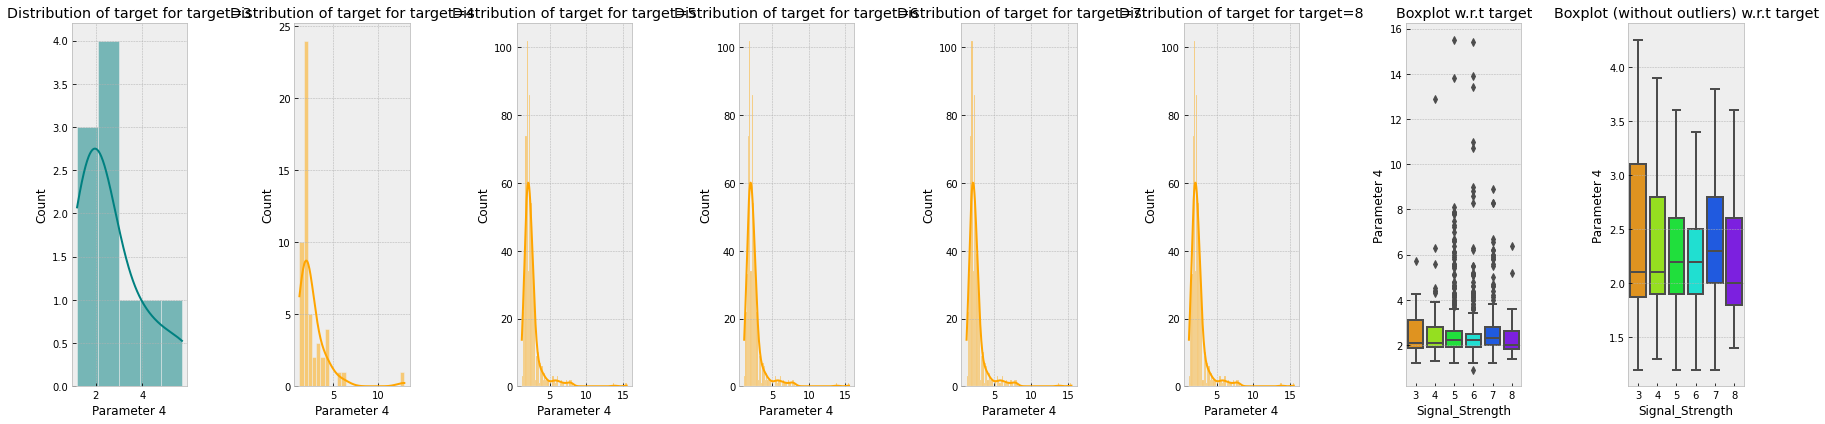

In [171]:
distribution_plot_wrt_target(signal_df, 'Parameter 4', "Signal_Strength")



*   Very large amout of outlier are present in Parameter 4. 
*   Most of the distribution is rightly skewed



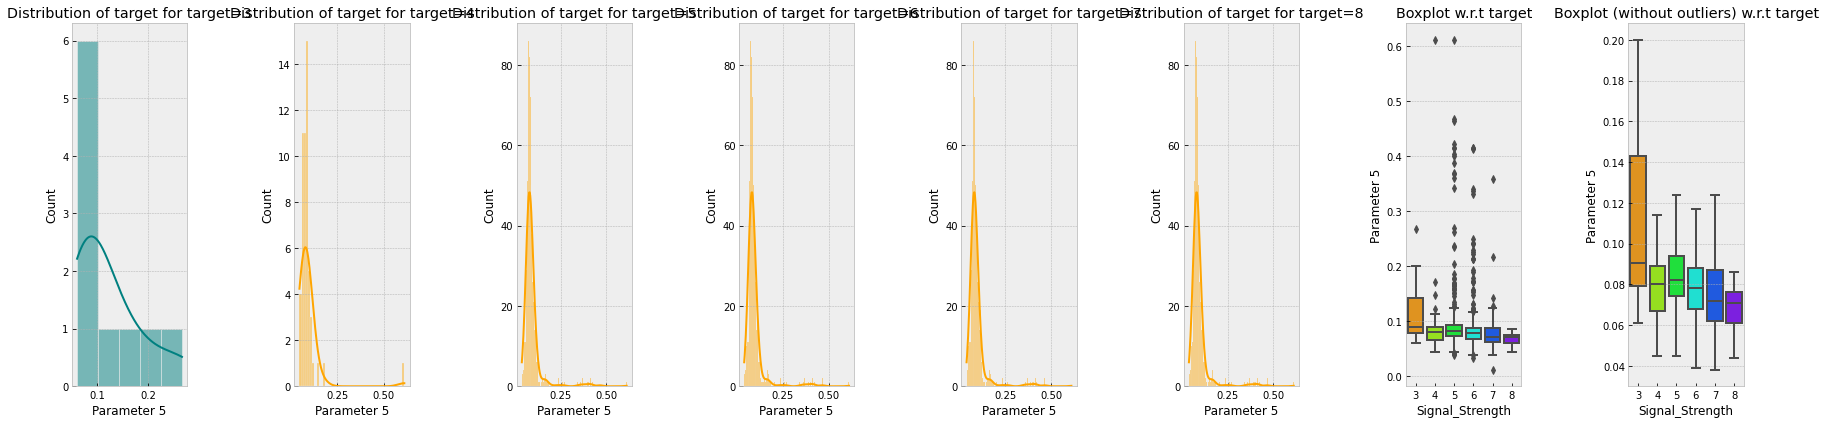

In [172]:
distribution_plot_wrt_target(signal_df, 'Parameter 5', "Signal_Strength")



*   Signal strength class 5,6 are having most outliers.
*   Signal strength class 3 are having most value near about 0




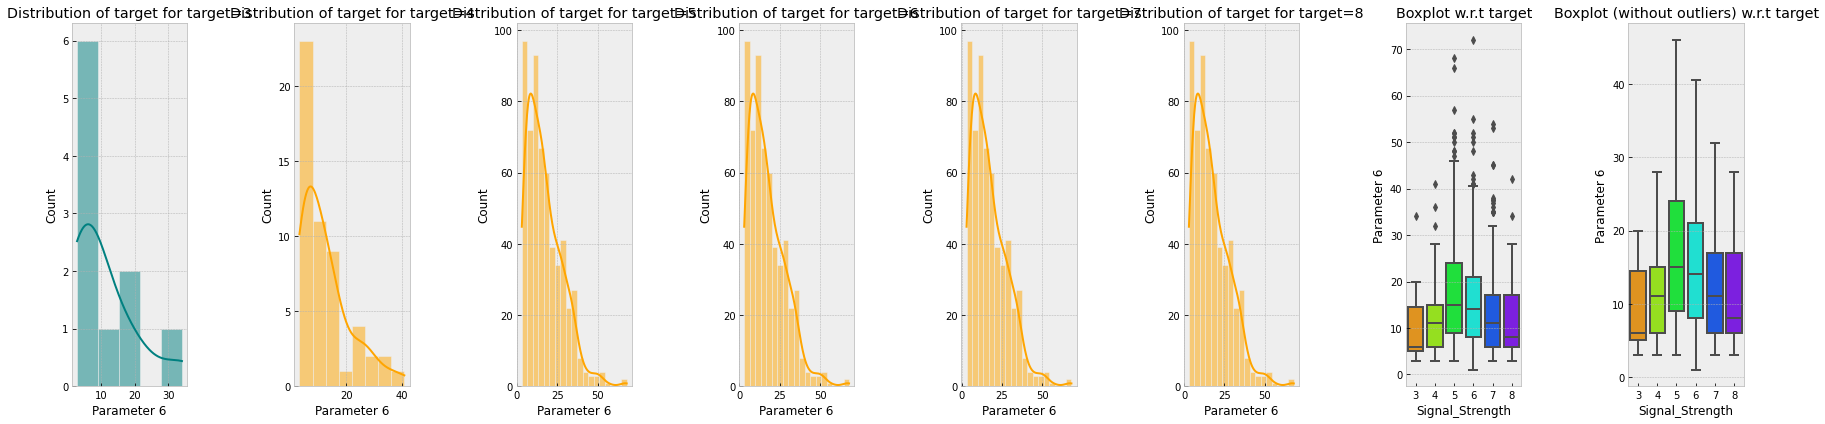

In [173]:
distribution_plot_wrt_target(signal_df, 'Parameter 6', "Signal_Strength")



*   Distribution is rightlu skewed
*   Outliers detected for each category



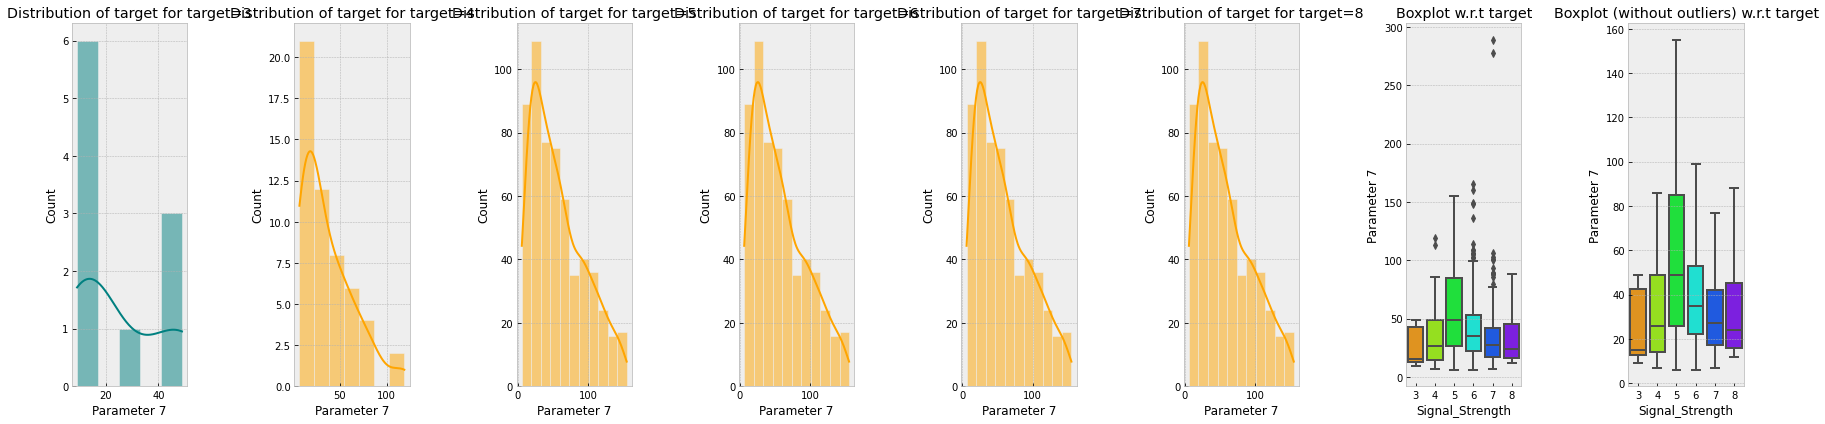

In [174]:
distribution_plot_wrt_target(signal_df, 'Parameter 7', "Signal_Strength")

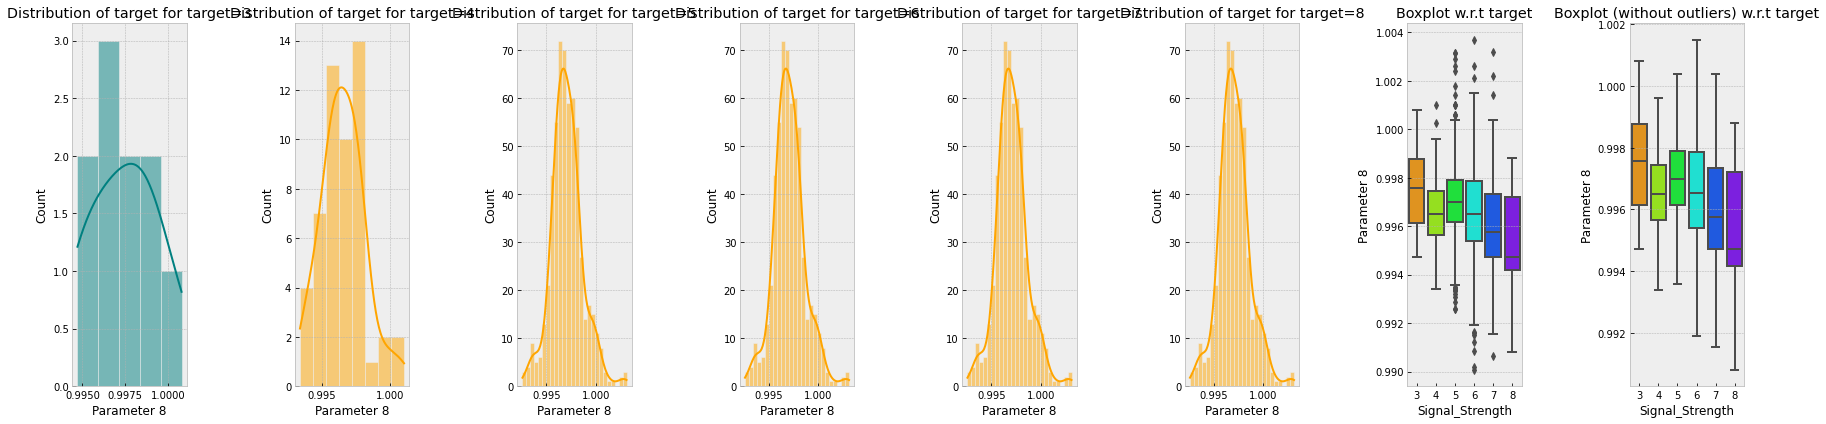

In [175]:
distribution_plot_wrt_target(signal_df, 'Parameter 8', "Signal_Strength")

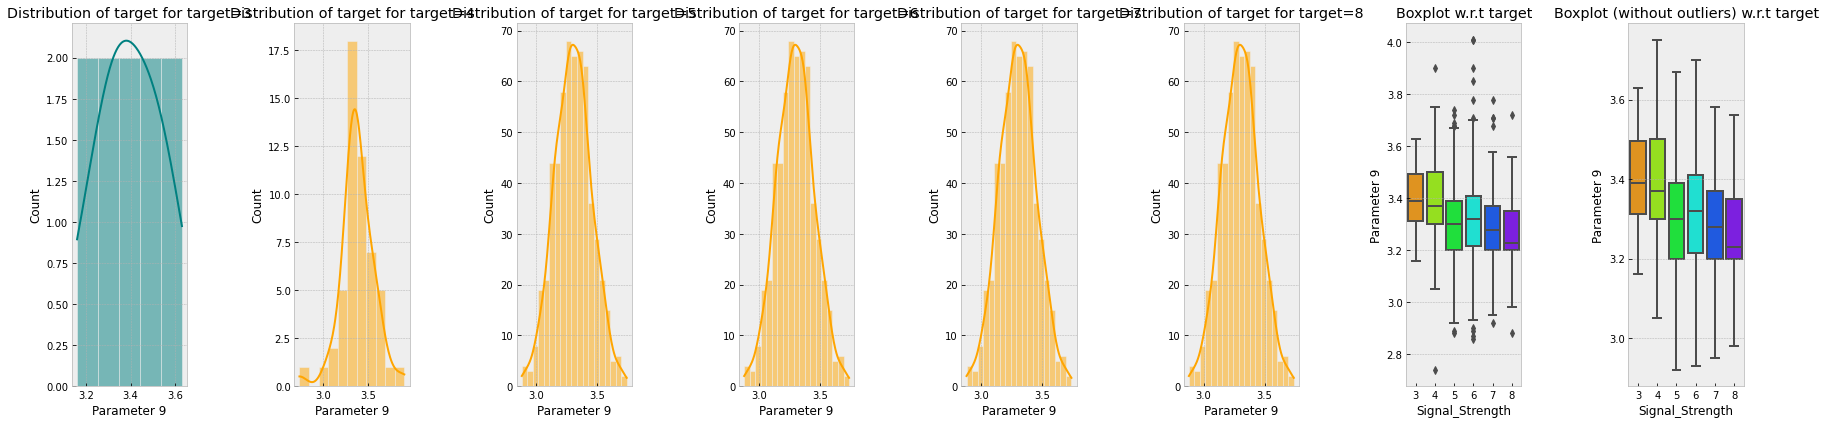

In [176]:
distribution_plot_wrt_target(signal_df, 'Parameter 9', "Signal_Strength")

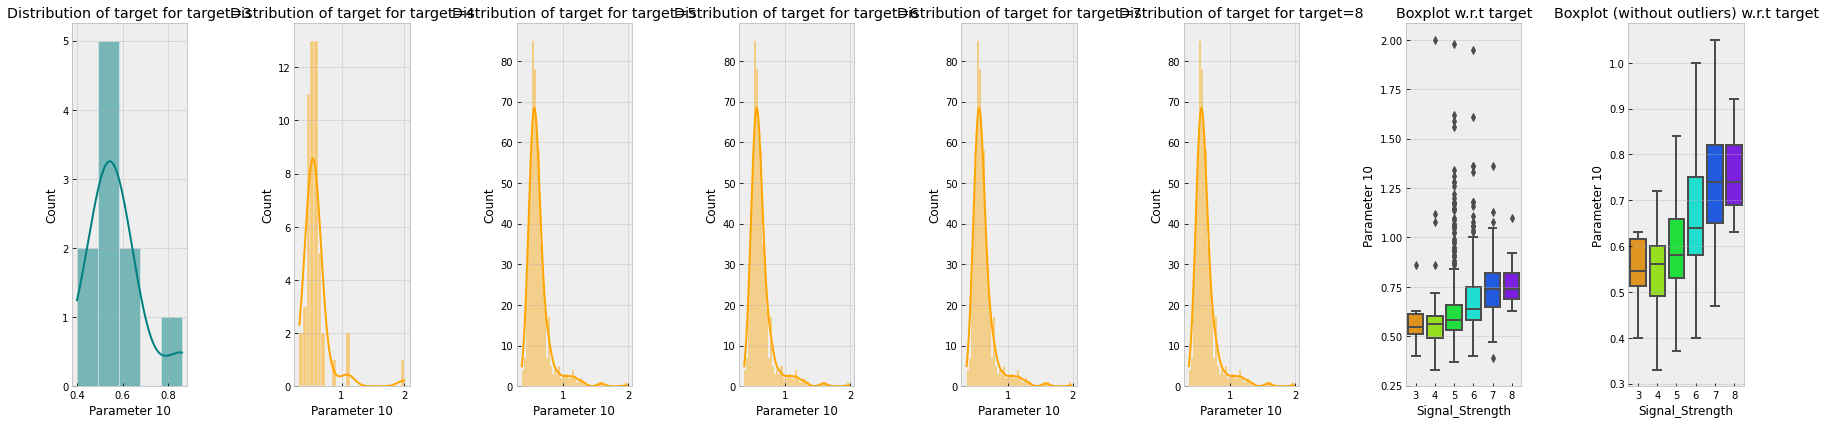

In [177]:
distribution_plot_wrt_target(signal_df, 'Parameter 10', "Signal_Strength")

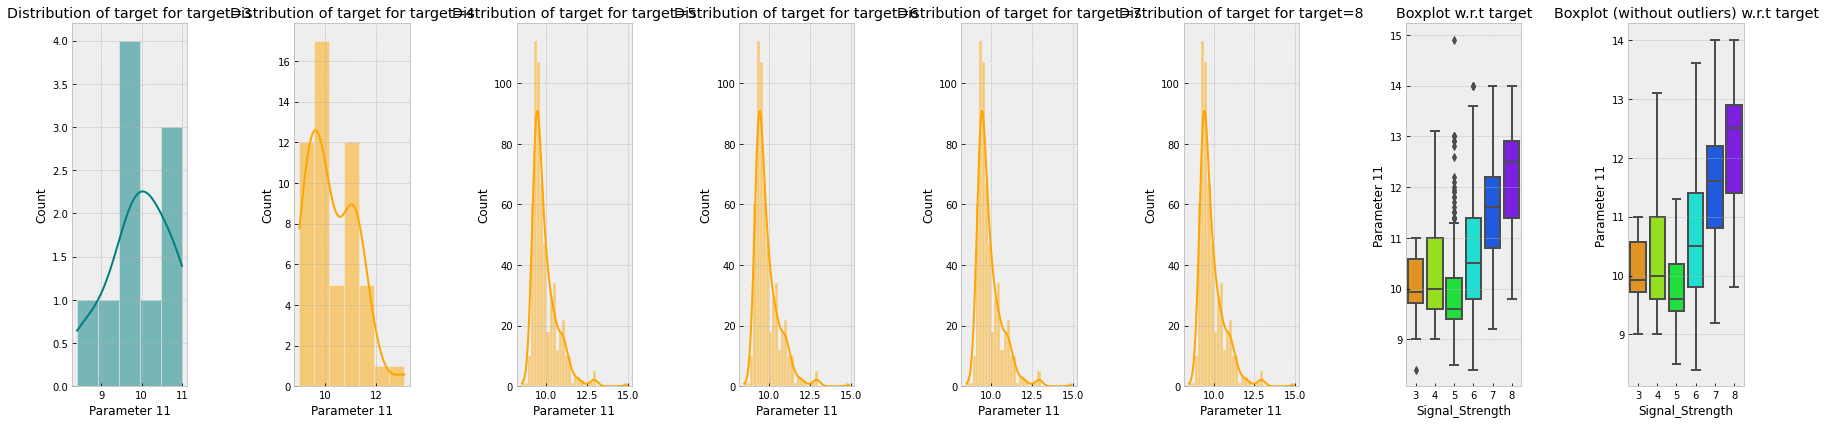

In [178]:
distribution_plot_wrt_target(signal_df, 'Parameter 11', "Signal_Strength")



*   Signal parameter for target class 3 are having less number of data.



Multivariant Analysis


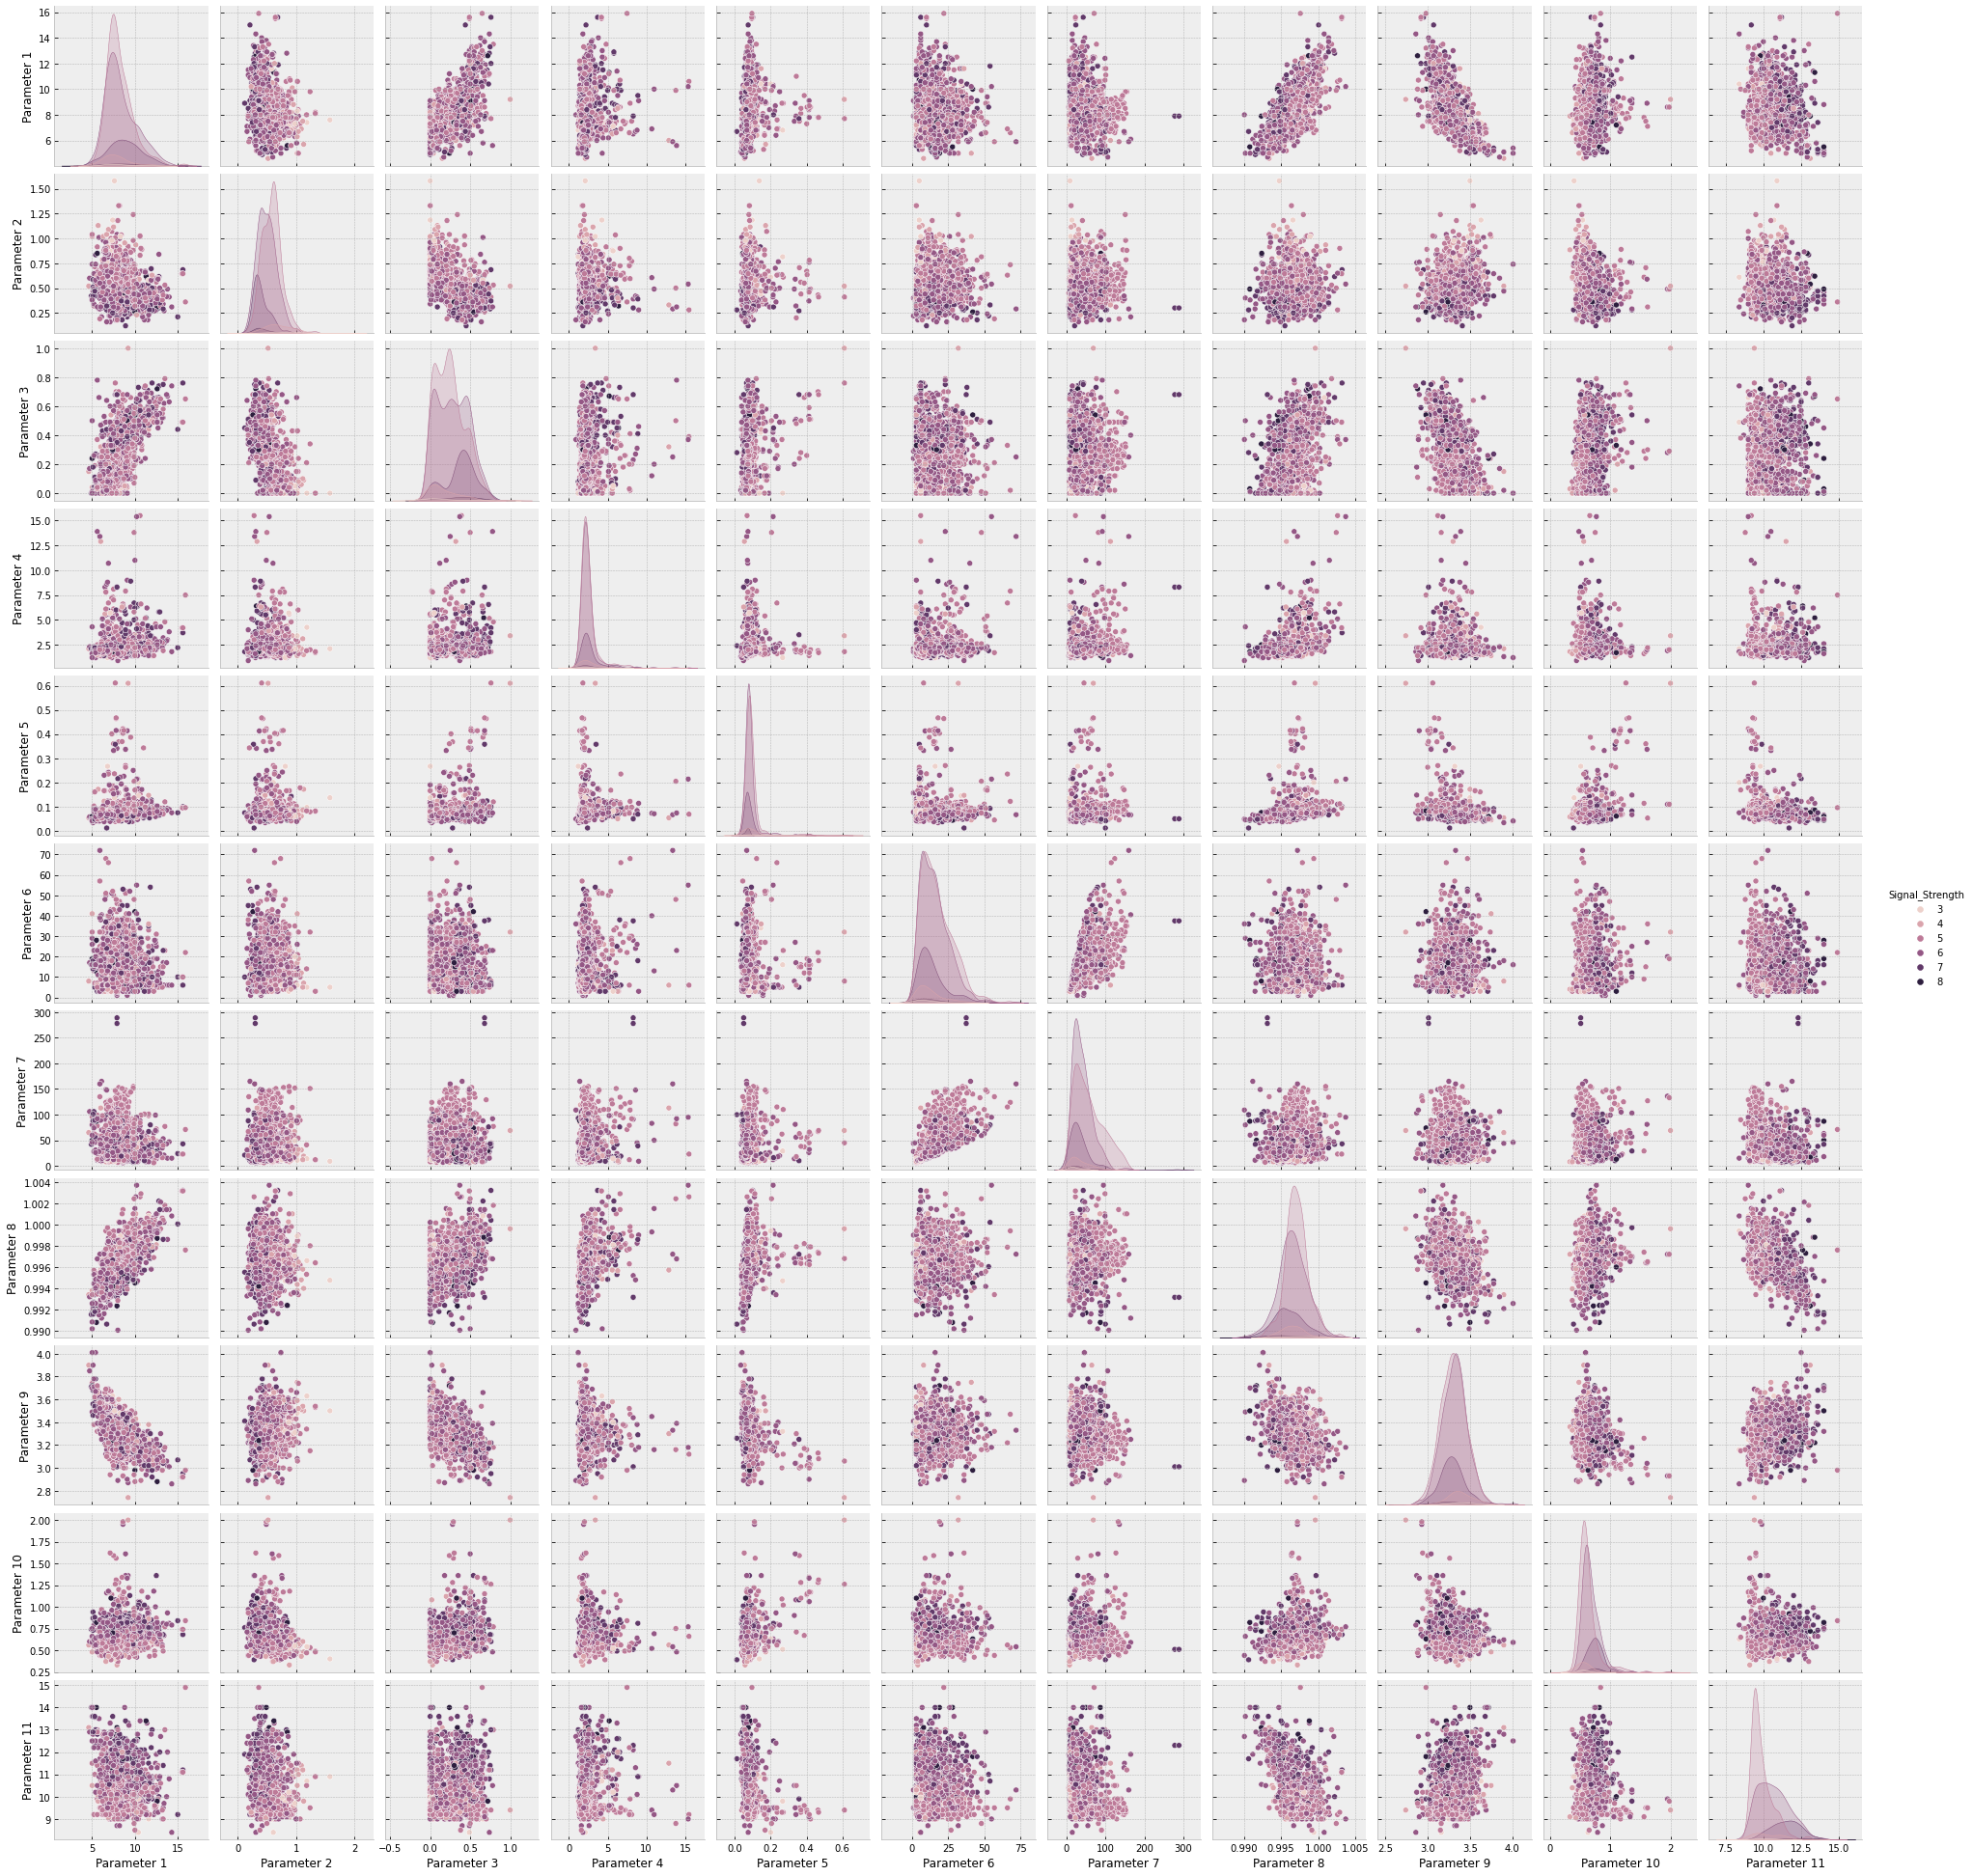

In [179]:
sns.pairplot(data=signal_df, hue='Signal_Strength')

There is a multicollinearity between parameter 1 and parameter 3 , parameter 1 and 9 

In [180]:
signal_df.corr()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000    -0.255124     0.667437     0.111025   
Parameter 2        -0.255124     1.000000    -0.551248    -0.002449   
Parameter 3         0.667437    -0.551248     1.000000     0.143892   
Parameter 4         0.111025    -0.002449     0.143892     1.000000   
Parameter 5         0.085886     0.055154     0.210195     0.026656   
Parameter 6        -0.140580    -0.020945    -0.048004     0.160527   
Parameter 7        -0.103777     0.071701     0.047358     0.201038   
Parameter 8         0.670195     0.023943     0.357962     0.324522   
Parameter 9        -0.686685     0.247111    -0.550310    -0.083143   
Parameter 10        0.190269    -0.256948     0.326062    -0.011837   
Parameter 11       -0.061596    -0.197812     0.105108     0.063281   
Signal_Strength     0.119024    -0.395214     0.228057     0.013640   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Parameter 1         0.085886    -0.140580    -0.103777     0.670195   
Parameter 2         0.055154    -0.020945     0.071701     0.023943   
Parameter 3         0.210195    -0.048004     0.047358     0.357962   
Parameter 4         0.026656     0.160527     0.201038     0.324522   
Parameter 5         1.000000     0.000749     0.045773     0.193592   
Parameter 6         0.000749     1.000000     0.667246    -0.018071   
Parameter 7         0.045773     0.667246     1.000000     0.078141   
Parameter 8         0.193592    -0.018071     0.078141     1.000000   
Parameter 9        -0.270893     0.056631    -0.079257    -0.355617   
Parameter 10        0.394557     0.054126     0.035291     0.146036   
Parameter 11       -0.223824    -0.080125    -0.217829    -0.504995   
Signal_Strength    -0.130988    -0.050463    -0.177855    -0.184252   

                 Parameter 9  Parameter 10  Parameter 11  Signal_Strength  
Parameter 1        -0.686685      0.190269     -0.061596         0.119024  
Parameter 2         0.247111     -0.256948     -0.197812        -0.395214  
Parameter 3        -0.550310      0.326062      0.105108         0.228057  
Parameter 4        -0.083143     -0.011837      0.063281         0.013640  
Parameter 5        -0.270893      0.394557     -0.223824        -0.130988  
Parameter 6         0.056631      0.054126     -0.080125        -0.050463  
Parameter 7        -0.079257      0.035291     -0.217829        -0.177855  
Parameter 8        -0.355617      0.146036     -0.504995        -0.184252  
Parameter 9         1.000000     -0.214134      0.213418        -0.055245  
Parameter 10       -0.214134      1.000000      0.091621         0.248835  
Parameter 11        0.213418      0.091621      1.000000         0.480343  
Signal_Strength    -0.055245      0.248835      0.480343         1.000000




*   Parameter 1 and Parameter 3 are somewhat corrected
*   Parameter 1 and parameter 8 are correlated.



D. Visualise distribution of the target variable. [2 Marks]  


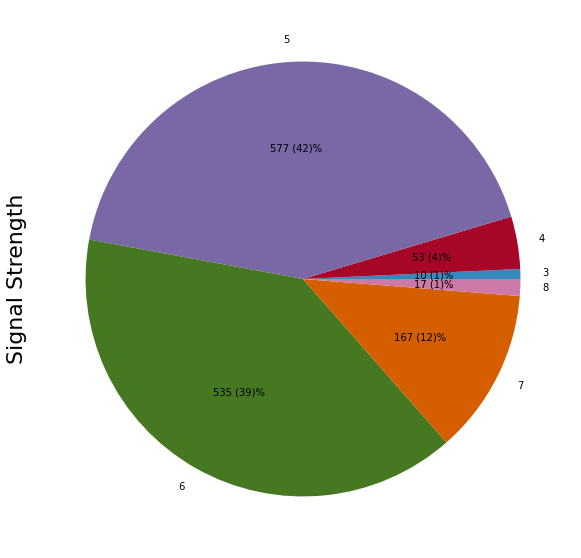

In [181]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 10))
def label_function(val):
    return f'{val / 100 * len(signal_df):.0f} ({val:.0f})%'
signal_df.groupby('Signal_Strength').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  ax=ax1)
ax1.set_ylabel('Signal Strength', size=22)
plt.show()

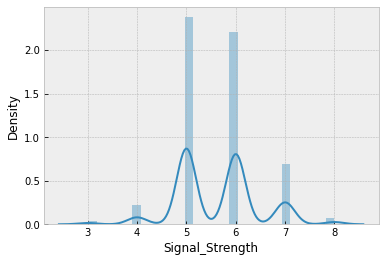

In [182]:
sns.distplot(signal_df['Signal_Strength'], kde=True, hist=True)

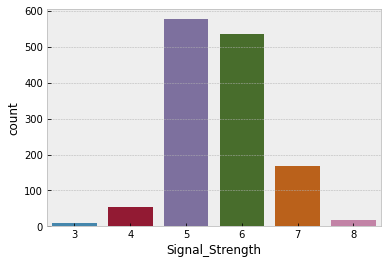

In [183]:
sns.countplot(data=signal_df, x= 'Signal_Strength')

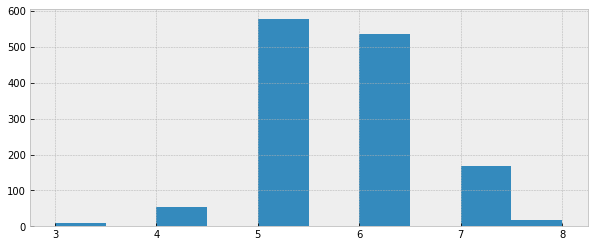

In [184]:
signal_df['Signal_Strength'].hist(figsize=(10, 4));

E. Share insights from the initial data analysis (at least 2). [2 Marks]

Observations: 

### 1) Looks like the dataset is not balanced.
###2) Class 3 and 8 are very less in numbers
###3) class 4 and 7 are comparative better than class 3 and 8
### 4) Majority class are 5 and 6
### 5) Model will be biased toward the majority classes.





Lets also check % percentage of element in each class

In [185]:
signal_df['Signal_Strength'].value_counts(1)*100

5    42.457689
6    39.367182
7    12.288447
4     3.899926
8     1.250920
3     0.735835
Name: Signal_Strength, dtype: float64

Observation:
### 1) Class 5 are having almost 42% of data
### 2) Class 4 are having almost 39% of data
### 3) Class 7 are having almost 12% of data
### 4) Class 4,8,3 are having almost 3,1 0.7 % of data
### 5) DataSet is imbalanced

### Handling Outliers. Replacing Outliers with Median Value

In [186]:
def replaceOutlierWithMedian(dataset, column):
    q1,q3 = np.quantile(dataset[column], [0.25,0.75])
    IQR = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1-(1.5*IQR)
    upper_whisker = q3 +(1.5*IQR)
    dataset[column]=np.where(dataset[column]>upper_whisker,dataset[column].median(),np.where(dataset[column]<lower_whisker,dataset[column].median(),dataset[column]))
    print('Outlier replaced from ', column , " feature")

Replacing outliers with median values

In [187]:
for feature in signal_df.drop('Signal_Strength',axis=1).columns:
    replaceOutlierWithMedian(signal_df, feature)

Outlier replaced from  Parameter 1  feature
Outlier replaced from  Parameter 2  feature
Outlier replaced from  Parameter 3  feature
Outlier replaced from  Parameter 4  feature
Outlier replaced from  Parameter 5  feature
Outlier replaced from  Parameter 6  feature
Outlier replaced from  Parameter 7  feature
Outlier replaced from  Parameter 8  feature
Outlier replaced from  Parameter 9  feature
Outlier replaced from  Parameter 10  feature
Outlier replaced from  Parameter 11  feature


In [188]:
### Outliers are replaced with median value and plot it again 

In [189]:
import math as math
plt.style.use('bmh') #Apply plot style to all the plots
def compareDistBoxPlt(df, no_of_feature, figXmultiplier, figYMultiplier):
    N = len(no_of_feature)
    cols =2;
    rows = int(math.ceil(N/cols))
    rows =rows*2
    fig,axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figXmultiplier*rows,figYMultiplier*cols))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        ax.set_axis_off()
    count = 0
    for i, column in enumerate(no_of_feature):
        sns.distplot(df[column],ax=axs[count]);
        axs[count].set_title(column+ " dist plot")
        axs[count].set_xlabel("")
        axs[count].set_axis_on()
        count=count+1
        sns.boxplot(data=df, x=column,ax = axs[count]);
        axs[count].set_title(column+ " Box plot")
        axs[count].set_xlabel("")
        axs[count].set_axis_on()
        count=count+1
            
    plt.show()

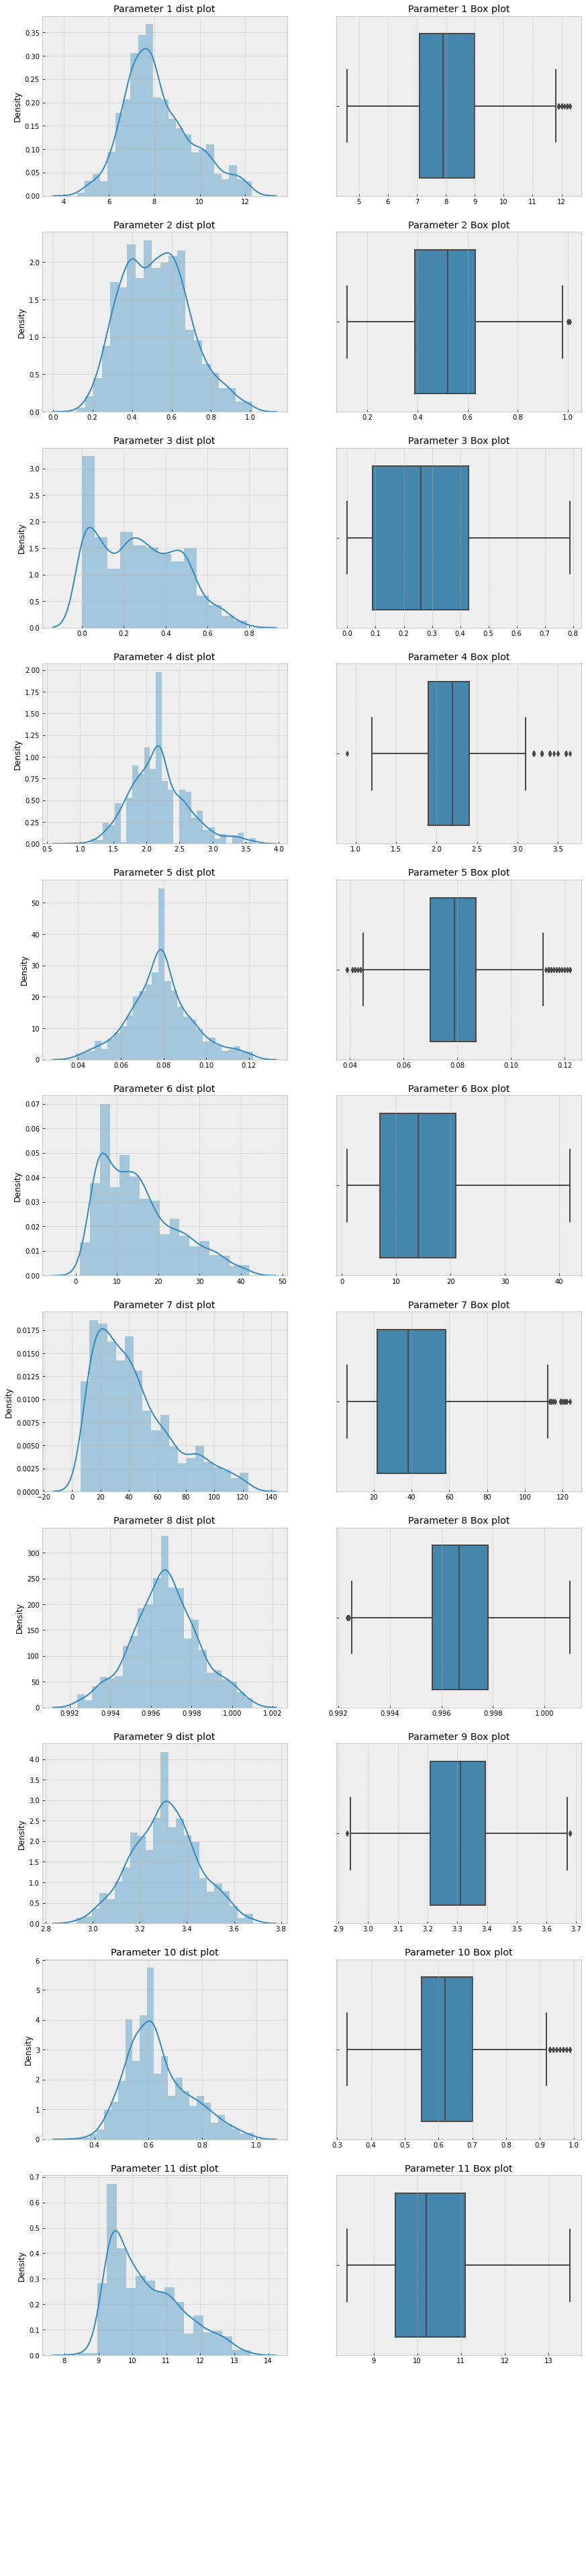

In [190]:
compareDistBoxPlt(signal_df, signal_df.drop('Signal_Strength',axis=1).columns, 1.2, 35);   


Observations:
> When Outliers will replace with median Values , Distribution become sharper and Standard deviation become lesser. The End result is there might be some outliers which is the result of previous outliers handling. We can live with that small outliiers.




2. Data preprocessing [7 Marks]
### A. Split the data into X & Y. [1 Marks]


In [191]:
X= signal_df.drop('Signal_Strength',axis=1)
y = signal_df[['Signal_Strength']]

Convert y labels since class weights give error if y_labels start from 3. It is expecting labels should start from 0 and even if we dont use label encoder, in this case 3 extra neuron will be taken which is of no use.

In [192]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y =pd.DataFrame(y, columns=['Signal_Strength'])

Using Label Encoder We converted  3 -->0 , 4-->1 ,5-->2,  6-->3 , 7 -->4 and 8-->5

B. Split the data into train & test with 70:30 proportion.[

In [193]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=1, stratify=y)

C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

In [194]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_train', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (951, 11)
Shape of y_train (951, 1)
Shape of y_train (408, 11)
Shape of y_test (408, 1)


In [195]:
###Checking train and test data are in sync

In [196]:
y_train.value_counts(normalize=True)*100

Signal_Strength
2                  42.481598
3                  39.327024
4                  12.302839
1                   3.890641
5                   1.261830
0                   0.736067
dtype: float64

In [197]:
y_test.value_counts(normalize=True)*100

Signal_Strength
2                  42.401961
3                  39.460784
4                  12.254902
1                   3.921569
5                   1.225490
0                   0.735294
dtype: float64

Observations:
From the above % of each element, it is verified that ratio of each class are same in both test and train.

D. Normalise the train and test data with appropriate method. [2 Marks]

In [198]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [199]:
y_train_cal = to_categorical(y_train,  dtype="uint8")
y_test_cal = to_categorical(y_test, dtype="uint8")

3. Model Training & Evaluation using Neural Network [13 Marks]
###  A. Design a Neural Network to train a classifier. [3 Marks]


In [200]:
input_dim = len(X.columns)
input_dim

11

In [201]:
np.random.seed(1)
import random
import tensorflow as tf
random.seed(1)
tf.random.set_seed(1)

In [202]:
model = Sequential()
model.add(Dense(units=128,  input_dim = input_dim,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer= Adam(learning_rate=1e-3), metrics = ['accuracy'])

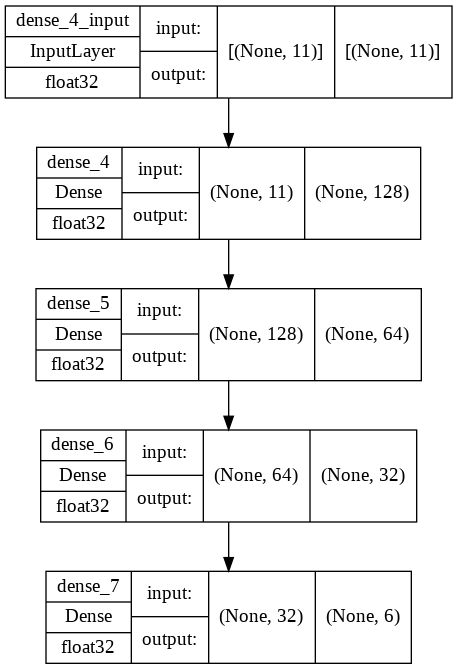

In [203]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
)

B. Train the classifier using previously designed Architecture [2 Marks]

In [204]:
stop_early = EarlyStopping(monitor='val_loss', mode='min', patience=7)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.00001,model='auto')

In [205]:
history_default_NN = model.fit(X_train_norm, y_train_cal, validation_data=(X_test_norm, y_test_cal), callbacks=[reduce_lr, stop_early], epochs=100, batch_size=32, verbose=2)

Epoch 1/100
30/30 - 1s - loss: 1.4954 - accuracy: 0.3943 - val_loss: 1.1948 - val_accuracy: 0.5123 - lr: 0.0010 - 617ms/epoch - 21ms/step
Epoch 2/100
30/30 - 0s - loss: 1.0861 - accuracy: 0.5794 - val_loss: 1.0997 - val_accuracy: 0.5760 - lr: 0.0010 - 103ms/epoch - 3ms/step
Epoch 3/100
30/30 - 0s - loss: 1.0139 - accuracy: 0.5952 - val_loss: 1.0567 - val_accuracy: 0.5956 - lr: 0.0010 - 105ms/epoch - 3ms/step
Epoch 4/100
30/30 - 0s - loss: 0.9695 - accuracy: 0.6057 - val_loss: 1.0484 - val_accuracy: 0.5931 - lr: 0.0010 - 100ms/epoch - 3ms/step
Epoch 5/100
30/30 - 0s - loss: 0.9334 - accuracy: 0.6183 - val_loss: 1.0273 - val_accuracy: 0.5956 - lr: 0.0010 - 103ms/epoch - 3ms/step
Epoch 6/100
30/30 - 0s - loss: 0.8975 - accuracy: 0.6351 - val_loss: 1.0299 - val_accuracy: 0.6005 - lr: 0.0010 - 100ms/epoch - 3ms/step
Epoch 7/100
30/30 - 0s - loss: 0.8739 - accuracy: 0.6383 - val_loss: 1.0245 - val_accuracy: 0.5760 - lr: 0.0010 - 103ms/epoch - 3ms/step
Epoch 8/100
30/30 - 0s - loss: 0.8525 - 

C. Plot 2 separate visuals. [3 Marks]
 ###  i. Training Loss and Validation Loss


In [206]:
history = pd.DataFrame(history_default_NN.history)

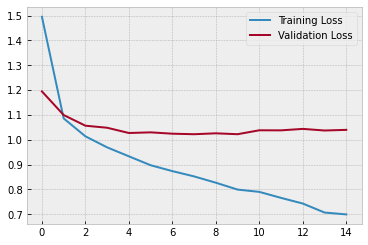

In [207]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

ii. Training Accuracy and Validation Accuracy

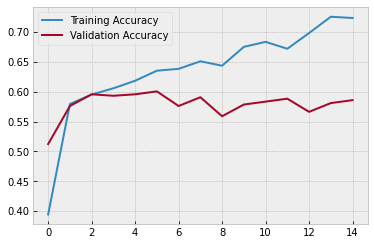

In [208]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [209]:
result= {}
loss, accuracy = model.evaluate(X_test_norm, y_test_cal)
result['Default NN with Original Dataset']  = [loss, accuracy, model, history_default_NN]
print('loss in Testing data ', loss)
print('Accuracy in Testing data ', accuracy)

13/13 [==============================] - 0s 2ms/step - loss: 1.0399 - accuracy: 0.5858
loss in Testing data  1.039906620979309
Accuracy in Testing data  0.5857843160629272


Accuracy in testing data is coming as 0.585 with default neural Network. 

In [210]:
y_pre = model.predict(X_test_norm)

In [211]:
y_pred_final=[]
for i in y_pre:
  y_pred_final.append(np.argmax(i))

### Printing the confusion metrics

In [212]:
xcal = np.sort(y_train['Signal_Strength'].unique())

Text(72.5, 0.5, 'Truth')

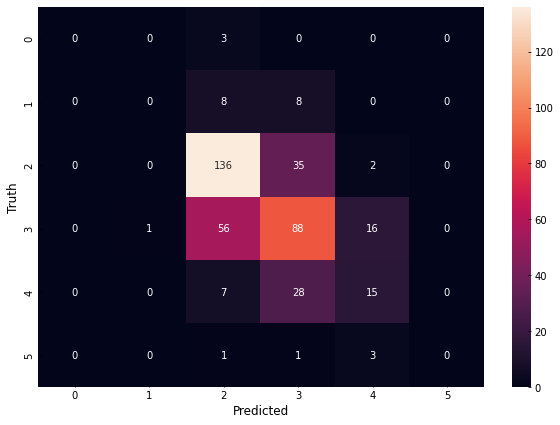

In [213]:
cm = confusion_matrix(y_test,y_pred_final)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=xcal,yticklabels=xcal)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [214]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.64      0.79      0.71       173
           3       0.55      0.55      0.55       161
           4       0.42      0.30      0.35        50
           5       0.00      0.00      0.00         5

    accuracy                           0.59       408
   macro avg       0.27      0.27      0.27       408
weighted avg       0.54      0.59      0.56       408





*   Observation:  Model is unable to predict the miniority class. It is biased towards the Majority class



D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

In [215]:
from tensorflow import keras
def build_model(hp):
  model = Sequential()
  for layer in range(hp.Int('num_layer', 1,10)):
    model.add(Dense(units=hp.Int("Units_"+str(layer+1), min_value=16, max_value=512, step=32), activation= hp.Choice('activation_' +str(layer+1), ["relu", 'LeakyReLU']),  kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_' + str(layer + 1) ,
                                    min_value=0.0,
                                    max_value=0.9,
                                    step=0.1)))
  model.add(Dense(units=6, activation='softmax'))
  # metric=AUC(
  #   num_thresholds=200, curve='PR',
  #   summation_method='interpolation', name=None, dtype=None,
  #   thresholds=None, multi_label=False, label_weights=None)
  metric = [
      #keras.metrics.TruePositives(name='tp'),
      #keras.metrics.FalsePositives(name='fp'),
      #keras.metrics.TrueNegatives(name='tn'),
      #keras.metrics.FalseNegatives(name='fn'), 
      #keras.metrics.Accuracy(name='accuracy'),
      #keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      #keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
  #metric=tf.keras.metrics.AUC(num_thresholds=200, curve='PR', summation_method='interpolation', name='prc', dtype=None,    thresholds=None, multi_label=True, label_weights=None)
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  #learning_rate = hp.Choice('learning_rate',values=[1e-1, 1e-2, 1e-3])
  model.compile(optimizer=Adam(learning_rate=learning_rate),loss=CategoricalCrossentropy(),metrics=['accuracy',metric],)
  return model

Hypertuning the neural network to find the best number of hidden layer and neuron.

In [216]:
tuner  = Hyperband(build_model, objective=kerastuner.Objective("val_accuracy", direction="max"), max_epochs=10, factor=2, hyperparameters=None, directory = 'my_dir3',project_name = '11',overwrite=True)
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
Units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'LeakyReLU'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.1, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [217]:
tuner.search(X_train_norm, y_train_cal,validation_data=(X_test_norm,y_test_cal), callbacks=[reduce_lr, stop_early])

Trial 46 Complete [00h 00m 06s]
val_accuracy: 0.5857843160629272

Best val_accuracy So Far: 0.6029411554336548
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [218]:
#tuner.results_summary()

Get the best Model

In [219]:
best_default_model = tuner.get_best_models()[0]



> Trained the model with best parameters



In [220]:

history_hypertuned = best_default_model.fit(X_train_norm, y_train_cal, validation_data=(X_test_norm, y_test_cal), callbacks=[reduce_lr, stop_early], epochs=100, batch_size=32, verbose=2)

Epoch 1/100
30/30 - 2s - loss: 1.1024 - accuracy: 0.6215 - recall: 0.4479 - prc: 0.6627 - val_loss: 1.0879 - val_accuracy: 0.6005 - val_recall: 0.3946 - val_prc: 0.5965 - lr: 5.1592e-04 - 2s/epoch - 78ms/step
Epoch 2/100
30/30 - 0s - loss: 1.1655 - accuracy: 0.5836 - recall: 0.4143 - prc: 0.6159 - val_loss: 1.0791 - val_accuracy: 0.5784 - val_recall: 0.3799 - val_prc: 0.5989 - lr: 5.1592e-04 - 210ms/epoch - 7ms/step
Epoch 3/100
30/30 - 0s - loss: 1.1554 - accuracy: 0.5952 - recall: 0.4185 - prc: 0.6249 - val_loss: 1.0599 - val_accuracy: 0.5809 - val_recall: 0.3946 - val_prc: 0.6041 - lr: 5.1592e-04 - 214ms/epoch - 7ms/step
Epoch 4/100
30/30 - 0s - loss: 1.1285 - accuracy: 0.6088 - recall: 0.4416 - prc: 0.6323 - val_loss: 1.0620 - val_accuracy: 0.5686 - val_recall: 0.3873 - val_prc: 0.5970 - lr: 5.1592e-04 - 216ms/epoch - 7ms/step
Epoch 5/100
30/30 - 0s - loss: 1.1172 - accuracy: 0.6109 - recall: 0.4332 - prc: 0.6360 - val_loss: 1.0528 - val_accuracy: 0.5735 - val_recall: 0.4167 - val_p



> Predict the Accuracy and loss with hypertuned model



In [221]:
y_pre = best_default_model.predict(X_test_norm)
y_pred_final=[]
for i in y_pre:
  y_pred_final.append(np.argmax(i))

In [222]:
loss, accuracy,recall,prc = best_default_model.evaluate(X_test_norm, y_test_cal)
result['Hypertuned Default NN with Original Dataset']  = [loss, accuracy, best_default_model, history_hypertuned]
print('loss in Testing data ', loss)
print('Accuracy in Testing data ', accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 0.9848 - accuracy: 0.5931 - recall: 0.4289 - prc: 0.6175
loss in Testing data  0.9847705960273743
Accuracy in Testing data  0.593137264251709


Observations:

*   Accuracy of hypertuned model is better than base model. Accuracy is 0.593
*   Loss Is Reduced to 0.984 from 1.03



Text(72.5, 0.5, 'Predicted')

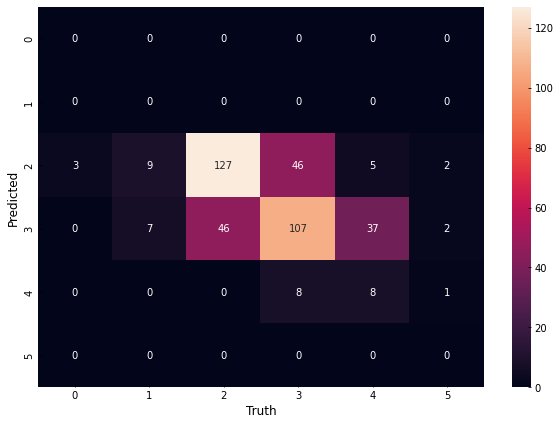

In [223]:
cm = confusion_matrix(y_pred_final,y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=xcal,yticklabels=xcal)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [224]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.66      0.73      0.70       173
           3       0.54      0.66      0.59       161
           4       0.47      0.16      0.24        50
           5       0.00      0.00      0.00         5

    accuracy                           0.59       408
   macro avg       0.28      0.26      0.25       408
weighted avg       0.55      0.59      0.56       408







*   3 has been converted to 0 , 4 has been converted to 1  and so on. 8 has been converted to 5
*   Accuracy is increased but it could not predict the miniority class
*   The f1-score of 0,1 and 5 are same as default model give.





# Train the hypertuned model with class weights



In [225]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train['Signal_Strength'].values)
class_weights = dict(zip(np.unique(y_train), class_weights))
#class_weights = dict(enumerate(class_weights))
class_weights

{0: 22.642857142857142,
 1: 4.283783783783784,
 2: 0.39232673267326734,
 3: 0.42379679144385024,
 4: 1.3547008547008548,
 5: 13.208333333333334}



> Hypertuned the model with class weights



In [226]:
tuner  = Hyperband(build_model, objective=kerastuner.Objective("val_accuracy", direction="max"), max_epochs=10, factor=2, directory = 'my_dir4',project_name = '431', overwrite=True)
tuner.search_space_summary()
tuner.search(X_train_norm, y_train_cal,validation_data=(X_test_norm,y_test_cal), callbacks=[reduce_lr, stop_early],class_weight=class_weights)

Trial 46 Complete [00h 00m 08s]
val_accuracy: 0.39950981736183167

Best val_accuracy So Far: 0.46078431606292725
Total elapsed time: 00h 05m 28s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Finding the best model from the above hypertuned models

In [227]:
best_model_cw = tuner.get_best_models()[0]
best_model_cw

In [228]:
history_class_weights = best_model_cw.fit(X_train_norm, y_train_cal, validation_data=(X_test_norm,y_test_cal), callbacks=[reduce_lr, stop_early], epochs=100, batch_size=32, verbose=2,class_weight=class_weights)
y_pre = best_model_cw.predict(X_test_norm)
y_pred_final=[]
for i in y_pre:
  y_pred_final.append(np.argmax(i))

Epoch 1/100
30/30 - 2s - loss: 0.9276 - accuracy: 0.3849 - recall: 0.1987 - prc: 0.3702 - val_loss: 1.2657 - val_accuracy: 0.4804 - val_recall: 0.2181 - val_prc: 0.4702 - lr: 7.5883e-04 - 2s/epoch - 74ms/step
Epoch 2/100
30/30 - 0s - loss: 0.9198 - accuracy: 0.3912 - recall: 0.1998 - prc: 0.3875 - val_loss: 1.2918 - val_accuracy: 0.4436 - val_recall: 0.2034 - val_prc: 0.4489 - lr: 7.5883e-04 - 209ms/epoch - 7ms/step
Epoch 3/100
30/30 - 0s - loss: 0.8862 - accuracy: 0.4301 - recall: 0.2292 - prc: 0.4209 - val_loss: 1.2580 - val_accuracy: 0.4681 - val_recall: 0.2377 - val_prc: 0.4682 - lr: 7.5883e-04 - 209ms/epoch - 7ms/step
Epoch 4/100
30/30 - 0s - loss: 0.8906 - accuracy: 0.4416 - recall: 0.2271 - prc: 0.4242 - val_loss: 1.2915 - val_accuracy: 0.4559 - val_recall: 0.1863 - val_prc: 0.4467 - lr: 7.5883e-04 - 207ms/epoch - 7ms/step
Epoch 5/100
30/30 - 0s - loss: 0.8616 - accuracy: 0.4269 - recall: 0.2250 - prc: 0.4418 - val_loss: 1.2742 - val_accuracy: 0.4730 - val_recall: 0.2010 - val_p

In [229]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.18      0.44      0.25        16
           2       0.67      0.58      0.62       173
           3       0.49      0.29      0.36       161
           4       0.33      0.66      0.44        50
           5       0.00      0.00      0.00         5

    accuracy                           0.46       408
   macro avg       0.28      0.33      0.28       408
weighted avg       0.53      0.46      0.47       408





*   Accuracy is decreased but it is able to detect class 1. Earlier it was Zero



In [230]:
loss, accuracy,recall ,prc  = best_model_cw.evaluate(X_test_norm, y_test_cal)
result['Hypertuned Default NN with Original Dataset with Class Weights']  = [loss, accuracy, best_model_cw, history_class_weights]
print('loss in Testing data ', loss)
print('Accuracy in Testing data ', accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 1.2434 - accuracy: 0.4559 - recall: 0.1985 - prc: 0.4453
loss in Testing data  1.24338698387146
Accuracy in Testing data  0.45588234066963196




*   Accuracy is dropped by almost 15% with class weights and loss is increased to 1.24




# train model with SMOTE

In [231]:
from imblearn.over_sampling import SMOTE

In [232]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_sm_norm = scaler.fit_transform(X_train_sm)
X_test__sm_norm = scaler.transform(X_test)

In [233]:
y_train_sm.value_counts()

Signal_Strength
0                  404
1                  404
2                  404
3                  404
4                  404
5                  404
dtype: int64



> Hypertuning with Smote training data



In [234]:
tuner  = Hyperband(build_model, objective=kerastuner.Objective("val_accuracy", direction="max"), max_epochs=10, factor=2, hyperparameters=None, directory = 'my_dir4',project_name = '221', overwrite=True)
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
Units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'LeakyReLU'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.9, 'step': 0.1, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [235]:
y_train_sm_cal = to_categorical(y_train_sm)
tuner.search(X_train_sm_norm, y_train_sm_cal,validation_data=(X_test__sm_norm,y_test_cal), callbacks=[reduce_lr, stop_early])

Trial 46 Complete [00h 00m 09s]
val_accuracy: 0.46078431606292725

Best val_accuracy So Far: 0.5196078419685364
Total elapsed time: 00h 06m 09s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Select Best model in SMOTE training dataset

In [236]:
best_model_sm = tuner.get_best_models()[0]
best_model_sm

In [237]:
history_smote = best_model_sm.fit(X_train_sm_norm, y_train_sm_cal, validation_data=(X_test__sm_norm,y_test_cal), callbacks=[reduce_lr, stop_early], epochs=100, batch_size=32, verbose=2)

Epoch 1/100
76/76 - 2s - loss: 0.8386 - accuracy: 0.6906 - recall: 0.6411 - prc: 0.7702 - val_loss: 1.8720 - val_accuracy: 0.5123 - val_recall: 0.4877 - val_prc: 0.4728 - lr: 0.0097 - 2s/epoch - 29ms/step
Epoch 2/100
76/76 - 0s - loss: 0.9713 - accuracy: 0.6440 - recall: 0.5796 - prc: 0.7072 - val_loss: 1.6992 - val_accuracy: 0.4142 - val_recall: 0.3505 - val_prc: 0.4071 - lr: 0.0097 - 414ms/epoch - 5ms/step
Epoch 3/100
76/76 - 0s - loss: 0.8176 - accuracy: 0.6873 - recall: 0.6258 - prc: 0.7724 - val_loss: 1.7841 - val_accuracy: 0.4216 - val_recall: 0.3529 - val_prc: 0.4271 - lr: 0.0097 - 397ms/epoch - 5ms/step
Epoch 4/100
76/76 - 0s - loss: 0.8076 - accuracy: 0.6856 - recall: 0.6287 - prc: 0.7696 - val_loss: 1.6274 - val_accuracy: 0.4559 - val_recall: 0.3995 - val_prc: 0.4096 - lr: 0.0097 - 401ms/epoch - 5ms/step
Epoch 5/100
76/76 - 0s - loss: 0.7255 - accuracy: 0.7108 - recall: 0.6654 - prc: 0.8080 - val_loss: 1.6306 - val_accuracy: 0.4534 - val_recall: 0.3701 - val_prc: 0.4461 - lr:

Calculating the Accuracy and loss

In [238]:
y_pre = best_model_sm.predict(X_test_norm)
y_pred_final=[]
for i in y_pre:
  y_pred_final.append(np.argmax(i))

In [239]:
loss, accuracy ,recall,prc = best_model_sm.evaluate(X_test__sm_norm, y_test_cal)
result['Hypertuned Default NN with Original Dataset With SMOTE']  = [loss, accuracy, best_model_sm, history_smote]
print('loss in Testing data ', loss)
print('Accuracy in Testing data ', accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 1.3677 - accuracy: 0.5270 - recall: 0.4559 - prc: 0.5219
loss in Testing data  1.3677393198013306
Accuracy in Testing data  0.5269607901573181


In [240]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.12      0.31      0.18        16
           2       0.71      0.53      0.61       173
           3       0.53      0.50      0.51       161
           4       0.38      0.54      0.45        50
           5       0.00      0.00      0.00         5

    accuracy                           0.50       408
   macro avg       0.29      0.31      0.29       408
weighted avg       0.56      0.50      0.52       408



a

In [241]:
def printResult(result):
    '''
    This method will print score in the form of table. It accept the dictionary object which has all the scores
    Param: result
    return Dataframe coming out from result
    '''
    result1 = pd.DataFrame(np.array(list(result.values()))[:,:-2],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Loss','Accuracy'],
                      index= result.keys())   # use the model names as index

    result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

    return result1

In [242]:
printResult(result)

Loss  Accuracy
Model                                                                 
Default NN with Original Dataset                    1.039907  0.585784
Hypertuned Default NN with Original Dataset         0.984771  0.593137
Hypertuned Default NN with Original Dataset wit...  1.243387  0.455882
Hypertuned Default NN with Original Dataset Wit...  1.367739  0.526961

If I consider Accuracy, then "Hypertuned Default NN with Original Dataset" is giving better accuracy. Hence ploting the accuracy and loss plot

E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

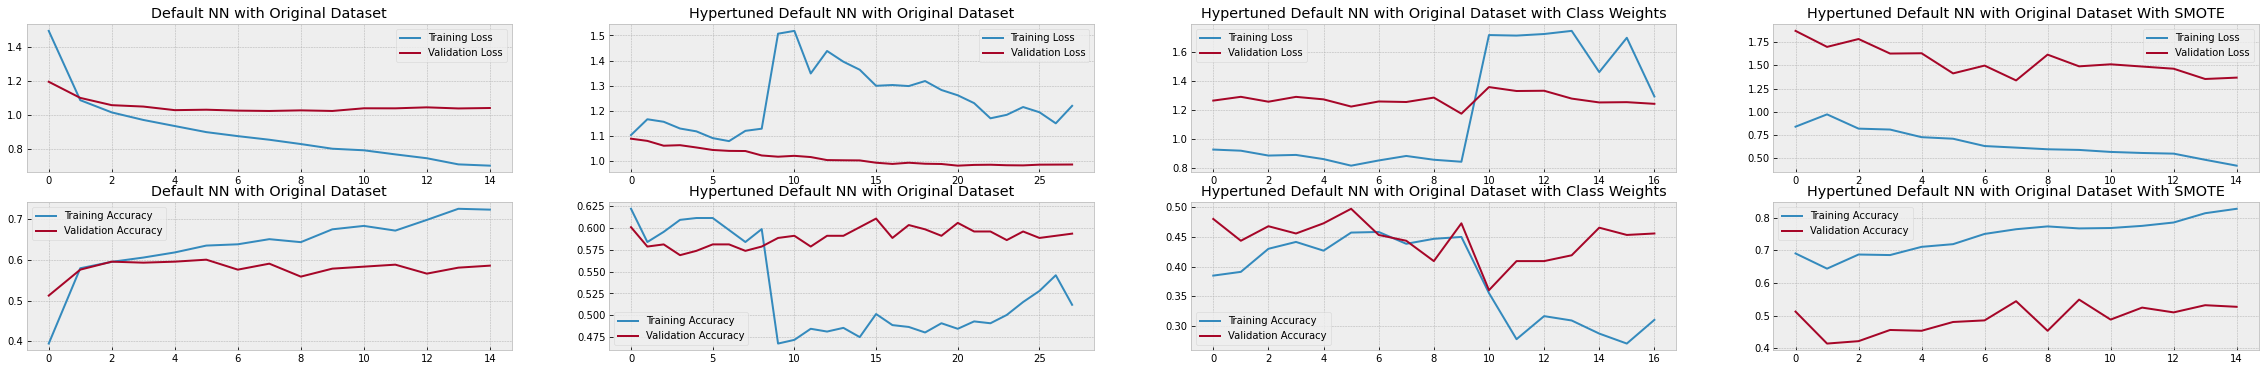

In [244]:
fig, axs = plt.subplots(2, 4, figsize = (40,6))

row = 0;
for  i, key in enumerate(result.keys()):
  axs[row][i].plot(pd.DataFrame( result[key][-1].history)['loss'])
  axs[row][i].plot(pd.DataFrame(result[key][-1].history)['val_loss'])
  axs[row][i].legend(['Training Loss', 'Validation Loss'])
  axs[row][i].title.set_text(key)
  #plt.show()
row = row+1;
for  i, key in enumerate(result.keys()):
  axs[row][i].plot(pd.DataFrame( result[key][-1].history)['accuracy'])
  axs[row][i].plot(pd.DataFrame(result[key][-1].history)['val_accuracy'])
  axs[row][i].legend(['Training Accuracy', 'Validation Accuracy'])
  axs[row][i].title.set_text(key)
plt.show()

Insight:



*   Accuracy of Default Neural Network is good (58%) , but there is overfitting.
*   Overfitting has been removed by hypertuning the default Neural network and getting the accuracy of 59.3%
*   loss has reduced.
*   Class weights is also tried in imbalance dataset and accuracy dropped by around 15% and model is not able to learn with training data. Training accuracy is very much dipped.
*   With SMote Dataset, the accuracy is much better than class weights, but not good as with original dataset.
*   But with Smote hypertuned model, model is predicting, minitority class which it has been able to predict with others model.
*   Loss is much lower in Hypertuned Default NN with Original Dataset.

*   Model will correctly identied the minority class if there are good amount of data present.
*   Since there are large amount of overlapping of data, model is not predicting much and not giving good accuracy.










Part B

      DOMAIN: Autonomous Vehicles

> PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks: 





```
1. Data Import and Exploration [5 Marks]
A. Read the .h5 file and assign to a variable. [2 Marks]
```



In [245]:
import h5py

1. Data Import and Exploration [5 Marks]

A. Read the .h5 file and assign to a variable.

In [246]:
data = h5py.File('/content/drive/My Drive/Colab Notebooks/DeepLearning/Assignment/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

B. Print all the keys from the .h5 file. [1 Marks]

In [247]:
list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [248]:
X_train, X_test,  y_train, y_test = data['X_train'],data['X_test']  ,data['y_train'] ,data['y_test']

2. Data Visualisation and preprocessing

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [249]:
print('Shape of X_train ', X_train.shape)
print('Shape of X_test ', X_test.shape)
print('Shape of y_train ', y_train.shape)
print('Shape of y_test ', y_test.shape)

Shape of X_train  (42000, 32, 32)
Shape of X_test  (18000, 32, 32)
Shape of y_train  (42000,)
Shape of y_test  (18000,)


B. Visualise first 10 images in train data and print its corresponding labels

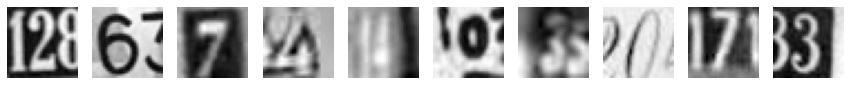

Label of Image is  [2 6 7 4 4 0 3 0 7 3]


In [250]:
plt.figure(figsize=(15,6));
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
plt.show()
print('Label of Image is ', y_train[0:10])

C. Reshape all the images with appropriate shape update the data in same variable. 

In [251]:
image_vector_size = 32*32
X_train = np.asarray(X_train).reshape(X_train.shape[0], image_vector_size)
X_test = np.asarray(X_test).reshape(X_test.shape[0], image_vector_size)

D. Normalise the images i.e. Normalise the pixel values.

In [252]:

X_train = X_train / 255.0
X_test = X_test / 255.0
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


E. Transform Labels into format acceptable by Neural Network

In [253]:
num_of_classes=10
y_train_cal = to_categorical(y_train,num_classes=num_of_classes)
y_test_cal = to_categorical(y_test, num_classes=num_of_classes)

F. Print total Number of classes in the Dataset.

In [254]:
print('total Number of classes in the Dataset. ' + str(len(np.unique(y_test))))

total Number of classes in the Dataset. 10


3. Model Training & Evaluation using Neural Network

A. Design a Neural Network to train a classifier.

In [255]:
image_size=32*32
model = Sequential();
model.add(Dense(units=128, activation='relu',  kernel_initializer= 'he_uniform', input_shape=(image_size,) ))
model.add(Dense(units=64, activation='relu',  kernel_initializer= 'he_uniform'))
model.add(Dense(units=32, activation='relu',  kernel_initializer= 'he_uniform'))
model.add(Dense(num_of_classes, activation='softmax'))

adam = Adam(lr=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               131200    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________


In [256]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
callbacks = [checkpoint,reduce_lr, stop_early]

B. Train the classifier using previously designed Architecture

In [257]:
# Fit the model
history=model.fit(X_train, y_train_cal, validation_data=(X_test, y_test_cal), epochs=100, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/100

Epoch 1: saving model to model_weights.h5
329/329 - 2s - loss: 2.2395 - accuracy: 0.1499 - val_loss: 2.0941 - val_accuracy: 0.2260 - lr: 0.0010 - 2s/epoch - 5ms/step
Epoch 2/100

Epoch 2: saving model to model_weights.h5
329/329 - 1s - loss: 1.7784 - accuracy: 0.3932 - val_loss: 1.5347 - val_accuracy: 0.4906 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 3/100

Epoch 3: saving model to model_weights.h5
329/329 - 1s - loss: 1.3096 - accuracy: 0.5860 - val_loss: 1.2397 - val_accuracy: 0.6104 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 4/100

Epoch 4: saving model to model_weights.h5
329/329 - 1s - loss: 1.2045 - accuracy: 0.6192 - val_loss: 1.1988 - val_accuracy: 0.6221 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 5/100

Epoch 5: saving model to model_weights.h5
329/329 - 1s - loss: 1.1386 - accuracy: 0.6436 - val_loss: 1.1244 - val_accuracy: 0.6500 - lr: 0.0010 - 998ms/epoch - 3ms/step
Epoch 6/100

Epoch 6: saving model to model_weights.h5
329/329 - 1s - loss: 1.0857 - accuracy: 0.6606 

Predicting the element using argmax function .. Model is giving probability of each class in target variable and using argmax, the maximum probability value will be considered.

In [258]:
# predicting the model on test data
y_pred=model.predict(X_test)
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))


In [259]:
loss, accuracy = model.evaluate(X_test, y_test_cal)
print('Test accuracy : ', accuracy)


563/563 [==============================] - 1s 2ms/step - loss: 0.6781 - accuracy: 0.8052
Test accuracy :  0.8051666617393494


In [260]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1814
           1       0.80      0.84      0.82      1828
           2       0.83      0.81      0.82      1803
           3       0.76      0.76      0.76      1719
           4       0.83      0.84      0.84      1812
           5       0.78      0.80      0.79      1768
           6       0.81      0.80      0.80      1832
           7       0.83      0.84      0.84      1808
           8       0.80      0.74      0.77      1812
           9       0.79      0.77      0.78      1804

    accuracy                           0.81     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.81      0.81      0.80     18000



Observations:


*   The Model is giving around 80% accuracy.
*   It is able to predict every number.
*   Lets Hypertuned the model and increase the accuracy with proper number of hidden layers and neurons.





Lets do hypertuning and finding the best neural network

In [261]:

def build_model(hp):
  model = Sequential()
  for layer in range(hp.Int('num_layer', 1,5)):
    model.add(Dense(units=hp.Int("Units_"+str(layer+1), min_value=16, max_value=512, step=32), activation= hp.Choice("activation"+str(layer+1), ["relu", 'LeakyReLU']),  kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_' + str(layer + 1) ,
                                    min_value=0.0,
                                    max_value=0.9,
                                    step=0.1)))
  model.add(Dense(units=num_of_classes, activation='softmax'))

  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
  model.compile(optimizer=Adam(learning_rate=learning_rate),loss=hp.Choice("loss" ,["categorical_crossentropy"]),metrics=["accuracy"],)
  return model
tuner  = Hyperband(build_model, objective=kerastuner.Objective("val_accuracy", direction="max"), max_epochs=10, factor=3, hyperparameters=None, directory = 'svhn',project_name = 'tuning',overwrite=True)
tuner.search_space_summary()

tuner.search(X_train, y_train_cal,validation_data=(X_test,y_test_cal), callbacks=callbacks)

Trial 30 Complete [00h 01m 30s]
val_accuracy: 0.16699999570846558

Best val_accuracy So Far: 0.750166654586792
Total elapsed time: 00h 17m 06s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit




*   Selecting the best model 




In [262]:
best_model = tuner.get_best_models()[0]

In [263]:
best_model

In [264]:
history=best_model.fit(X_train, y_train_cal, validation_data=(X_test, y_test_cal), epochs=100, batch_size=256, verbose=2,callbacks=callbacks)

Epoch 1/100

Epoch 1: saving model to model_weights.h5
165/165 - 2s - loss: 0.8257 - accuracy: 0.7511 - val_loss: 0.7238 - val_accuracy: 0.7881 - lr: 4.7887e-04 - 2s/epoch - 13ms/step
Epoch 2/100

Epoch 2: saving model to model_weights.h5
165/165 - 1s - loss: 0.7952 - accuracy: 0.7608 - val_loss: 0.6849 - val_accuracy: 0.7992 - lr: 4.7887e-04 - 879ms/epoch - 5ms/step
Epoch 3/100

Epoch 3: saving model to model_weights.h5
165/165 - 1s - loss: 0.7729 - accuracy: 0.7682 - val_loss: 0.6821 - val_accuracy: 0.8004 - lr: 4.7887e-04 - 873ms/epoch - 5ms/step
Epoch 4/100

Epoch 4: saving model to model_weights.h5
165/165 - 1s - loss: 0.7635 - accuracy: 0.7688 - val_loss: 0.6916 - val_accuracy: 0.7962 - lr: 4.7887e-04 - 880ms/epoch - 5ms/step
Epoch 5/100

Epoch 5: saving model to model_weights.h5
165/165 - 1s - loss: 0.7540 - accuracy: 0.7742 - val_loss: 0.6999 - val_accuracy: 0.7962 - lr: 4.7887e-04 - 867ms/epoch - 5ms/step
Epoch 6/100

Epoch 6: saving model to model_weights.h5
165/165 - 1s - lo

In [265]:
# predicting the model on test data
y_pred=best_model.predict(X_test)

In [266]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

C. Evaluate performance of the model with appropriate metrics.

In [267]:
loss, accuracy = best_model.evaluate(X_test, y_test_cal)
print('Test accuracy : ', accuracy)

563/563 [==============================] - 2s 3ms/step - loss: 0.5439 - accuracy: 0.8406
Test accuracy :  0.8406111001968384


In [268]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1814
           1       0.83      0.86      0.84      1828
           2       0.87      0.84      0.86      1803
           3       0.81      0.79      0.80      1719
           4       0.85      0.87      0.86      1812
           5       0.80      0.85      0.82      1768
           6       0.85      0.83      0.84      1832
           7       0.86      0.87      0.86      1808
           8       0.86      0.78      0.82      1812
           9       0.84      0.82      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



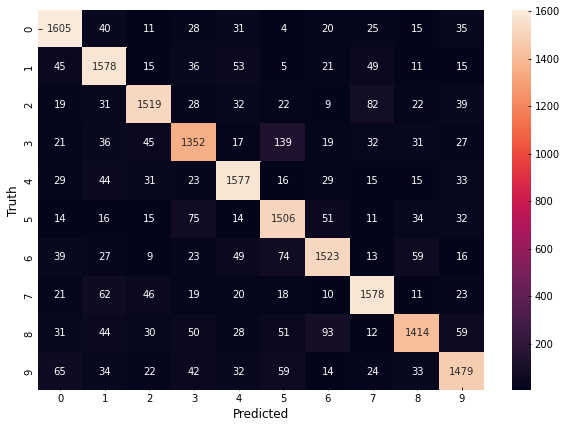

In [269]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()



*   Accuracy is increased with hypertuning
*   Most of the time, model is predicting correct labels. There are small occurance, where model is not predicting. It is because of the image quality is poorly and it was not written .



Mis Classification Images

In [270]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 7, 8, 11, 27, 40, 45, 46, 56, 58, 62, 64, 68, 89, 100, 108, 132, 136, 137, 138, 148, 150, 151, 154, 155, 158, 182, 183, 184, 186, 188, 200, 203, 210, 222, 223, 232, 251, 252, 253, 256, 267, 268, 274, 303, 323, 337, 346, 347, 351, 363, 372, 389, 398, 404, 415, 418, 437, 446, 448, 451, 456, 457, 489, 496, 498, 503, 504, 507, 510, 520, 527, 528, 530, 532, 535, 537, 551, 556, 560, 562, 563, 583, 586, 592, 600, 612, 619, 633, 640, 663, 664, 665, 690, 691, 694, 704, 706, 715, 728, 753, 768, 771, 780, 784, 787, 795, 797, 813, 814, 835, 838, 849, 856, 860, 862, 869, 871, 872, 882, 887, 891, 895, 896, 907, 908, 926, 935, 936, 942, 946, 948, 951, 953, 954, 955, 965, 985, 988, 993, 995, 997, 1001, 1006, 1009, 1021, 1025, 1026, 1029, 1045, 1046, 1050, 1051, 1057, 1060, 1073, 1074, 1080, 1085, 1086, 1089, 1106, 1109, 1112, 1123, 1126, 1132, 1133, 1137, 1139, 1142, 1147, 1148, 1150, 1155, 1159, 1180, 1186, 1189, 1204, 1205, 1207, 1208, 1220, 1223, 1227, 1232, 1244, 1252, 1255, 1256, 1260, 1279, 

Was predicted  0
Was labeled  6
Predicted Probabilities:  [[0.2978457  0.11034926 0.0696594  0.04331229 0.04450411 0.0751532
  0.15464994 0.05441099 0.10711899 0.04299614]]


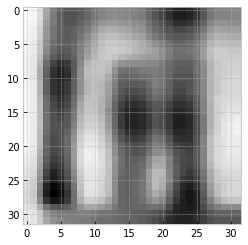

In [271]:
image_index = 40
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

Observation:


*   Image quality is very poor.So model is not predicting it correctly




D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same. [

Loss Curve

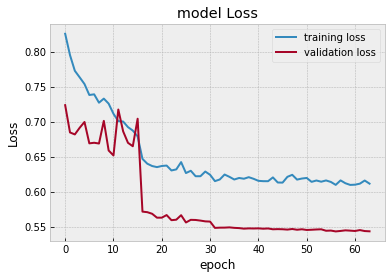

In [272]:
plt.plot(history.history['loss'])
plt.plot( history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.show()

Observations: 

*   Validation loss is decreasing when increase the epoch value
*   Even the validation loss is not changing after 60 epoch



Accuracy Curve

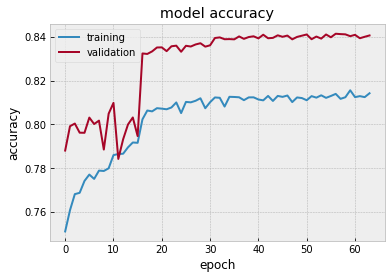

In [273]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Obserations: 


*   Validation Accuracy is high after epoch 18.
*   Accuracy is almost stagnant around 84%



Insights: 


*   There are total 10 number of classes in the target variables.
*   Accuracy of model without hypertuned is 79% ans with hypertuning it is giving 84%
*   Accuracy is improved with Hypertuning. Earlier Model is overfited after certain point. But after hypertuning, Using DropOut layer, overfitting has been removed.
*   Now model is performing good and predicted the number.



